# MAT-classification: Analysis and Classification methods for Multiple Aspect Trajectory Data Mining \[MAT-Tools Framework\]

Sample Code in python notebook to use mat-classification as a python library.

The present package offers a tool, to support the user in the task of data analysis of multiple aspect trajectories. It integrates into a unique framework for multiple aspects trajectories and in general for multidimensional sequence data mining methods.

Created on Dec, 2023
Copyright (C) 2023, License GPL Version 3 or superior (see LICENSE file)

In [1]:
!pip3 install mat-classification

ERROR: Could not find a version that satisfies the requirement mat-analysis (from versions: none)
ERROR: No matching distribution found for mat-analysis


## 1. Loading data
To use helpers for data pre-processing, import from package `matdata` (dependency: [mat-data](https://github.com/ttportela/mat-data)):

### 1.1. Loading a sample data
    a) Lets start by loading FoursquareNYC data:
(For other preprocessing functions, check the docs: https://mat-analysis.github.io/mat-tools/

In [15]:
from matdata.dataset import load_ds

dataset='mat.FoursquareNYC'
# We will use 5% of the dataset, to simplify
data = load_ds(dataset, missing='-999')
data

Loading dataset file: https://github.com/mat-analysis/datasets/tree/main/mat/FoursquareNYC/


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1055k  100 1055k    0     0   639k      0  0:00:01  0:00:01 --:--:--  640k


space  time       day  \
0      40.8331652006224 -73.9418603427692   317    Monday   
1      40.8340978041072 -73.9452672225881  1404    Monday   
2      40.8331652006224 -73.9418603427692     0   Tuesday   
3      40.7646959283254 -73.8851974964414  1069  Thursday   
4      40.7660790376824 -73.8835287094116  1120  Thursday   
...                                   ...   ...       ...   
66941  40.7047332789043 -73.9877378940582  1037    Friday   
66942  40.6951627360199 -73.9954478691072  1210    Friday   
66943  40.6978026652822 -73.9941451630314   481  Saturday   
66944  40.6946728967503 -73.9940820360805   819  Saturday   
66945  40.6978026652822 -73.9941451630314   476    Sunday   

                                        poi                          type  \
0         The Lair Of Modern Strange Cowboy                Home (private)   
1                       Galaxy Gourmet Deli                 Deli / Bodega   
2         The Lair Of Modern Strange Cowboy                Home (private)   
3                 Popeyes Louisiana Kitchen           Fried Chicken Joint   
4      MTA Bus Operations Depot - LaGuardia                   Bus Station   
...                                     ...                           ...   
66941              Miami Ad School Brooklyn  General College & University   
66942                  Lantern Thai Kitchen               Thai Restaurant   
66943                 Eastern Athletic Club                           Gym   
66944                             Starbucks                   Coffee Shop   
66945                 Eastern Athletic Club                           Gym   

                   root_type  rating weather    tid  label  
0                  Residence    -1.0   Clear    126      6  
1                       Food     8.2  Clouds    126      6  
2                  Residence    -1.0  Clouds    126      6  
3                       Food     6.6   Clear    126      6  
4         Travel & Transport    -1.0   Clear    126      6  
...                      ...     ...     ...    ...    ...  
66941   College & University    -1.0  Clouds  29563   1070  
66942                   Food     8.0  Clouds  29563   1070  
66943  Outdoors & Recreation     6.9  Clouds  29563   1070  
66944                   Food     7.0  Clouds  29563   1070  
66945  Outdoors & Recreation     6.9  Clouds  29563   1070  

[66946 rows x 10 columns]

In [16]:
from matdata.preprocess import klabels_stratify
train, test = klabels_stratify(data, kl=5)

train.label.unique(), '--', len(train.tid.unique()), len(test.tid.unique())

Spliting Data (class-balanced):   0%|          | 0/5 [00:00<?, ?it/s]

Sorting data:   0%|          | 0/5 [00:00<?, ?it/s]

Sorting data:   0%|          | 0/5 [00:00<?, ?it/s]

(array([ 84, 164, 181, 390, 768]), '--', 56, 28)

### 1.2. Saving and Conversions
    b) Saving trajectories:

In [2]:
import pandas as pd
train.to_parquet(f'sample/data/{dataset.split(".")[1]}/train.parquet', index=False)
test.to_parquet(f'sample/data/{dataset.split(".")[1]}/test.parquet', index=False)

Also, we can save using the converter functions (which provide more options), in other formats for other input types of methods:

In [32]:
from matdata.converter import df2csv, df2zip, df2parquet

# Saving as csv:
df2csv(train, f'sample/data/{dataset.split(".")[1]}', 'train')
df2csv(test, f'sample/data/{dataset.split(".")[1]}', 'test')

# Saving as zip (containing trajectory type of files):
df2zip(train, f'sample/data/{dataset.split(".")[1]}', 'train')
df2zip(test, f'sample/data/{dataset.split(".")[1]}', 'test')

# Saving as parquet (override):
df2parquet(train, f'sample/data/{dataset.split(".")[1]}', 'train')
df2parquet(test, f'sample/data/{dataset.split(".")[1]}', 'test')

# Check docs:
help(df2parquet)

Writing CSV: sample/data/FoursquareNYC/train.csv
Done.
 --------------------------------------------------------------------------------
Writing CSV: sample/data/FoursquareNYC/test.csv
Done.
 --------------------------------------------------------------------------------


Writing ZIP:   0%|          | 0/193 [00:00<?, ?it/s]

Writing ZIP:   0%|          | 0/193 [00:00<?, ?it/s]

Writing Parquet: sample/data/FoursquareNYC/train.parquet
Done.
 --------------------------------------------------------------------------------
Writing Parquet: sample/data/FoursquareNYC/test.parquet
Done.
 --------------------------------------------------------------------------------
Help on function df2parquet in module matdata.converter:

df2parquet(df, data_path, file='train', tid_col='tid', class_col='label', select_cols=None, opLabel='Writing Parquet')
    Writes a pandas DataFrame to a Parquet file.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to be written to the Parquet file.
    data_path : str
        The directory path where the Parquet file will be saved.
    file : str, optional (default='train')
        The base name of the Parquet file (without extension).
    tid_col : str, optional (default='tid')
        The name of the column to be used as the trajectory identifier.
    class_col : str, optional (default='label')
        Th

Then, experiment with a classifier.

## 2. Classification Methods

TODO

- `prepare_input(train, test)` => `model.train()` => `model.test()`
- `model.fit(X_train, y_train, X_val, y_val)` => `model.predict(X_test, y_test)`

### 2.1. Trajectory Based Methods

TODO

#### 2.1.1. MARC

TODO

In [16]:
from matclassification.methods import MARC

model = MARC()
model.prepare_input(train, test)
model.test()
## We can visualize the training report (the same on most models):
model.report


[MARC:] Building model

###########    DATA PREPARATION      ###########
[    INFO    ] 2024-06-05 22:50:45 :: Attribute 'space': 878 unique values
[    INFO    ] 2024-06-05 22:50:45 :: Attribute 'time': 1077 unique values
[    INFO    ] 2024-06-05 22:50:45 :: Attribute 'day': 7 unique values
[    INFO    ] 2024-06-05 22:50:45 :: Attribute 'poi': 772 unique values
[    INFO    ] 2024-06-05 22:50:45 :: Attribute 'type': 220 unique values
[    INFO    ] 2024-06-05 22:50:45 :: Attribute 'root_type': 10 unique values
[    INFO    ] 2024-06-05 22:50:45 :: Attribute 'rating': 51 unique values
[    INFO    ] 2024-06-05 22:50:45 :: Attribute 'weather': 6 unique values
[    INFO    ] 2024-06-05 22:50:45 :: Total of attribute/value pairs: 3021
[[    INFO    ] 2024-06-05 22:50:45 :: Processing trajectory 84/84. 
[    INFO    ] 2024-06-05 22:50:45 :: Loading data from files ... DONE!
[    INFO    ] 2024-06-05 22:50:45 :: Trajectories:  84
[    INFO    ] 2024-06-05 22:50:45 :: Labels:        5
[ 

Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

===== Training Epoch 1 =====
Epoch 1/1000


2024-06-05 22:50:46.536477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-05 22:50:46.756660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-05 22:50:46.950566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 33.4981 - acc: 0.2500 - top_k_categorical_accuracy: 1.0000

2024-06-05 22:50:47.544367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-05 22:50:47.633857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-05 22:50:48.117129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-05 22:50:48.196471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 160ms/step
TRAIN		acc: 0.660714	acc_top5: 1.000000	f1_macro: 0.592214	prec_macro: 0.778214	rec_macro: 0.611364
1/1 [==============================] - 0s 162ms/step
TEST		acc: 0.571429	acc_top5: 1.000000	f1_macro: 0.446739	prec_macro: 0.804444	rec_macro: 0.517857
1/1 [==============================] - 3s 3s/step - loss: 33.4981 - acc: 0.2500 - top_k_categorical_accuracy: 1.0000 - val_loss: 32.6775 - val_acc: 0.5714 - val_top_k_categorical_accuracy: 1.0000
===== Training Epoch 2 =====
Epoch 2/1000
2/2 [==============================] - 0s 22ms/stepss: 32.6593 - acc: 0.6250 - top_k_categorical_accuracy: 1.00
TRAIN		acc: 0.660714	acc_top5: 1.000000	f1_macro: 0.513714	prec_macro: 0.879832	rec_macro: 0.585714
1/1 [==============================] - 0s 27ms/step
TEST		acc: 0.571429	acc_top5: 1.000000	f1_macro: 0.446739	prec_macro: 0.804444	rec_macro: 0.517857
1/1 [==============================] - 0s 322ms/step - loss: 32.6593 - acc: 0.6250 - top_k_cat

loss       acc  top_k_categorical_accuracy   val_loss   val_acc  \
0   33.498089  0.250000                         1.0  32.677513  0.571429   
1   32.659283  0.625000                         1.0  31.878498  0.571429   
2   31.861290  0.589286                         1.0  31.095528  0.607143   
3   31.058887  0.678571                         1.0  30.327919  0.535714   
4   30.293327  0.571429                         1.0  29.573318  0.535714   
..        ...       ...                         ...        ...       ...   
69   3.439326  1.000000                         1.0   3.398284  1.000000   
70   3.301705  1.000000                         1.0   3.265671  1.000000   
71   3.169610  1.000000                         1.0   3.138643  1.000000   
72   3.042176  1.000000                         1.0   3.017703  1.000000   
73   2.921333  1.000000                         1.0   2.901027  1.000000   

    val_top_k_categorical_accuracy  
0                              1.0  
1                              1.0  
2                              1.0  
3                              1.0  
4                              1.0  
..                             ...  
69                             1.0  
70                             1.0  
71                             1.0  
72                             1.0  
73                             1.0  

[74 rows x 6 columns]

In [17]:
# and this is the model available metrics:
model.summary()

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  f1_macro
0  1.0         1.0                1.0              1.0           1.0       1.0

Or, you can repeat the classification in a number of rounds with increasing random seed:

In [ ]:
model.test(rounds=3)

[MARC:] Creating a model to test set


Model Testing:   0%|          | 0/3 [00:00<?, ?it/s]

===== Training Epoch 1 =====
Epoch 1/1000


2024-05-22 19:32:24.653874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-22 19:32:26.587537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-22 19:32:27.993756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - ETA: 0s - loss: 36.3919 - acc: 0.0155 - top_k_categorical_accuracy: 0.0259       

2024-05-22 19:32:40.144168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-22 19:32:41.016571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-22 19:32:44.098632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-22 19:32:44.819353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 3s 303ms/step
TRAIN		acc: 0.056995	acc_top5: 0.129534	f1_macro: 0.026043	prec_macro: 0.834238	rec_macro: 0.056995
7/7 [==============================] - 1s 113ms/step
TEST		acc: 0.015544	acc_top5: 0.056995	f1_macro: 0.005605	prec_macro: 0.848100	rec_macro: 0.015544
4/4 [==============================] - 24s 5s/step - loss: 36.3919 - acc: 0.0155 - top_k_categorical_accuracy: 0.0259 - val_loss: 34.1034 - val_acc: 0.0155 - val_top_k_categorical_accuracy: 0.0570
===== Training Epoch 2 =====
Epoch 2/1000
7/7 [==============================] - 1s 93ms/stepss: 33.3410 - acc: 0.0207 - top_k_categorical_accu
TRAIN		acc: 0.077720	acc_top5: 0.279793	f1_macro: 0.048093	prec_macro: 0.897532	rec_macro: 0.077720
7/7 [==============================] - 0s 44ms/step
TEST		acc: 0.015544	acc_top5: 0.051813	f1_macro: 0.003523	prec_macro: 0.903668	rec_macro: 0.015544
4/4 [==============================] - 10s 3s/step - loss: 33.3410 - acc: 0.0207 - top_k_categorical_ac

2024-05-22 19:47:19.078993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-22 19:47:21.552765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-22 19:47:23.970048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - ETA: 0s - loss: 36.4269 - acc: 0.0000e+00 - top_k_categorical_accuracy: 0.0155   

2024-05-22 19:47:43.530319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-22 19:47:44.839134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-22 19:47:49.820569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-22 19:47:50.907642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 5s 510ms/step
TRAIN		acc: 0.082902	acc_top5: 0.186528	f1_macro: 0.048438	prec_macro: 0.793794	rec_macro: 0.082902
7/7 [==============================] - 2s 246ms/step
TEST		acc: 0.005181	acc_top5: 0.041451	f1_macro: 0.000576	prec_macro: 0.736056	rec_macro: 0.005181
4/4 [==============================] - 39s 9s/step - loss: 36.4269 - acc: 0.0000e+00 - top_k_categorical_accuracy: 0.0155 - val_loss: 34.1471 - val_acc: 0.0052 - val_top_k_categorical_accuracy: 0.0415
===== Training Epoch 2 =====
Epoch 2/1000
7/7 [==============================] - 1s 104ms/steps: 33.3802 - acc: 0.0415 - top_k_categorical_accura
TRAIN		acc: 0.170984	acc_top5: 0.388601	f1_macro: 0.110096	prec_macro: 0.797946	rec_macro: 0.170984
7/7 [==============================] - 0s 51ms/step
TEST		acc: 0.015544	acc_top5: 0.056995	f1_macro: 0.005253	prec_macro: 0.775604	rec_macro: 0.015544
4/4 [==============================] - 15s 4s/step - loss: 33.3802 - acc: 0.0415 - top_k_categori

2024-05-22 20:05:17.263798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-22 20:05:20.744713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-22 20:05:23.087408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - ETA: 0s - loss: 36.4638 - acc: 0.0104 - top_k_categorical_accuracy: 0.0259

2024-05-22 20:05:45.323099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-22 20:05:46.629875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-22 20:05:51.858570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-22 20:05:53.116037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 6s 605ms/step
TRAIN		acc: 0.072539	acc_top5: 0.212435	f1_macro: 0.047797	prec_macro: 0.825416	rec_macro: 0.072539
7/7 [==============================] - 2s 208ms/step
TEST		acc: 0.020725	acc_top5: 0.056995	f1_macro: 0.004993	prec_macro: 0.785788	rec_macro: 0.020725
4/4 [==============================] - 45s 10s/step - loss: 36.4638 - acc: 0.0104 - top_k_categorical_accuracy: 0.0259 - val_loss: 34.1770 - val_acc: 0.0207 - val_top_k_categorical_accuracy: 0.0570
===== Training Epoch 2 =====
Epoch 2/1000
7/7 [==============================] - 1s 101ms/steps: 33.4148 - acc: 0.0466 - top_k_categorical_accura
TRAIN		acc: 0.145078	acc_top5: 0.321244	f1_macro: 0.098803	prec_macro: 0.867466	rec_macro: 0.145078
7/7 [==============================] - 1s 108ms/step
TEST		acc: 0.020725	acc_top5: 0.072539	f1_macro: 0.007408	prec_macro: 0.845793	rec_macro: 0.020725
4/4 [==============================] - 19s 5s/step - loss: 33.4148 - acc: 0.0466 - top_k_categorica

In [ ]:
## We can visualize the test report (the same on most models):
model.test_report

In [ ]:
# And show the mean results
model.summary()

You may want to use the classifier in a traditional way:

In [ ]:
from matclassification.methods import MARC

model = MARC()

# Each classifier expect a ceirtain input format. If you want to change, check the 'xy' method:
(keys, vocab_size, num_classes, max_length, le, x_train, x_test, y_train, y_test) = model.xy(train, test)

# You can add method variables with this:
model.add_config(keys=keys, 
                 vocab_size=vocab_size,
                 num_classes=num_classes,
                 max_length=max_length)
model.le = le # The label encoder

# Run the classifier:
model.fit(x_train, y_train, x_test, y_test)

summary, y_pred = model.predict(x_test, y_test)

In [ ]:
summary

#### 2.1.2. POI-Sequences (extention of POI-Frequency)

In [17]:
from matclassification.methods import POIS

sequences = [1] # Sequence sizes to use, example, for 1, 2 or 3 points use: [1, 2, 3] 
features = ['poi'] # Features to build frequency matrix combined with sequence sizes, 
                   # by default selects the feature with higher variance
# method='npoi' # you can pass the extract method

model = POIS('npoi', sequences, features)
model.prepare_input(train, test)
#model.prepare_input(test, train)
model.test()


[NPOI:] Building model
5 5 False
5 5 False
[POIS:] Starting feature extractor ... 
Dataset: specific, Feature: poi, Sequence: 1
Starting NPOI...
[POIS:] Processing time: 50.708000000000006 milliseconds. Done.
------------------------------------------------------------------------------------------------
[NPOI:] Creating a model to test set


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

===== Training Epoch 1 =====


2024-06-07 20:18:34.968665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-07 20:18:35.135385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 12ms/step
TRAIN		acc: 0.339286	acc_top5: 1.000000	f1_macro: 0.314762	prec_macro: 0.349825	rec_macro: 0.318019
1/1 [==============================] - 0s 13ms/step
TEST		acc: 0.250000	acc_top5: 1.000000	f1_macro: 0.238974	prec_macro: 0.275000	rec_macro: 0.248571
===== Training Epoch 2 =====
2/2 [==============================] - 0s 2ms/step
TRAIN		acc: 0.678571	acc_top5: 1.000000	f1_macro: 0.650667	prec_macro: 0.652747	rec_macro: 0.656494
1/1 [==============================] - 0s 9ms/step


2024-06-07 20:18:35.217691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


TEST		acc: 0.535714	acc_top5: 1.000000	f1_macro: 0.512967	prec_macro: 0.526667	rec_macro: 0.517143
===== Training Epoch 3 =====
2/2 [==============================] - 0s 3ms/step
TRAIN		acc: 0.928571	acc_top5: 1.000000	f1_macro: 0.915397	prec_macro: 0.912698	rec_macro: 0.919643
1/1 [==============================] - 0s 8ms/step
TEST		acc: 0.714286	acc_top5: 1.000000	f1_macro: 0.656667	prec_macro: 0.650000	rec_macro: 0.664286
===== Training Epoch 4 =====
2/2 [==============================] - 0s 3ms/step
TRAIN		acc: 0.982143	acc_top5: 1.000000	f1_macro: 0.977719	prec_macro: 0.986667	rec_macro: 0.971429
1/1 [==============================] - 0s 8ms/step
TEST		acc: 0.785714	acc_top5: 1.000000	f1_macro: 0.753571	prec_macro: 0.777778	rec_macro: 0.742857
===== Training Epoch 5 =====
2/2 [==============================] - 0s 3ms/step
TRAIN		acc: 1.000000	acc_top5: 1.000000	f1_macro: 1.000000	prec_macro: 1.000000	rec_macro: 1.000000
1/1 [==============================] - 0s 8ms/step
TEST		acc:

AttributeError: 'POIS' object has no attribute 'start_time'

In [ ]:
model.summary()

If you want to use just the feature extractor, you can check `poifreq` submodule:

In [ ]:
from matclassification.methods.feature.feature_extraction.pois import pois

sequences = [1,2,3]
features = ['poi']
method='npoi' # default: 'npoi', or, 'poi' and 'wnpoi'

x_train, x_test, y_train, y_test, _ = pois(train, test, sequences, features, method, 
                                           result_dir='./sample/results/pois', save_all=True) # And we save the results

display(x_train)

In [18]:
from matclassification.methods.feature.feature_extraction.pois import pois

sequences = [1]
features = ['poi']
method='npoi' # default: 'npoi', or, 'poi' and 'wnpoi'

x_train, x_test, y_train, y_test, _ = pois(train, test, sequences, features, method, 
                                           result_dir='./sample/results/pois', save_all=True) # And we save the results

display(x_train)

[POIS:] Starting feature extractor ... 
Dataset: specific, Feature: poi, Sequence: 1
Starting NPOI...
[POIS:] Processing time: 106.672 milliseconds. Done.
------------------------------------------------------------------------------------------------


0         1         2        3         4         5         6    \
0   0.024390  0.073171  0.048780  0.02439  0.024390  0.024390  0.024390   
1   0.000000  0.027778  0.037037  0.00000  0.009259  0.027778  0.009259   
2   0.000000  0.021505  0.000000  0.00000  0.000000  0.000000  0.000000   
3   0.000000  0.000000  0.020833  0.00000  0.000000  0.020833  0.020833   
4   0.015385  0.046154  0.030769  0.00000  0.000000  0.000000  0.000000   
5   0.000000  0.017241  0.000000  0.00000  0.000000  0.000000  0.000000   
6   0.000000  0.046512  0.023256  0.00000  0.000000  0.000000  0.000000   
7   0.000000  0.042553  0.021277  0.00000  0.000000  0.000000  0.000000   
8   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
9   0.000000  0.000000  0.057143  0.00000  0.000000  0.000000  0.000000   
10  0.000000  0.014493  0.057971  0.00000  0.000000  0.000000  0.000000   
11  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
12  0.000000  0.000000  0.067797  0.00000  0.000000  0.000000  0.016949   
13  0.041667  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
14  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
15  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
16  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
17  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
18  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
19  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
20  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
21  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
22  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
23  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
24  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
25  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
26  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
27  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
28  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
29  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
30  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
31  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
32  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
33  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
34  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
35  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
36  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
37  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
38  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
39  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
40  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
41  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
42  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
43  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
44  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
45  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
46  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
47  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
48  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
49  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
50  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
51  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
52  0.000000  0.000000  0.000000  

And then you can create the classifier (another way of using the classifier classes in the classical way):

In [ ]:
from matclassification.methods.feature.POIS import POIS, prepareData

sequences = [1]
features = ['poi']

# POIS method have a method for data transformation:
num_features, num_classes, labels, X, y, one_hot_y = prepareData(x_train, x_test, y_train, y_test)
x_train, x_test = X
y_train, y_test = y

# Create the classifier:
model = POIS('npoi', sequences, features)

# You can add method variables with this:
model.add_config(num_features=num_features,
                num_classes=num_classes, 
                labels=labels)

# Run the classifier:
model.fit(x_train, y_train, x_test, y_test)

summary, y_pred = model.predict(x_test, y_test)

In [ ]:
summary

The next classifiers use Hiperparameter Optimization (class derrived from `HPSClassifier`), thus we first call `model.train()` to test model configurations to look for the best model.

#### 2.1.3. DeepeST

TODO

In [20]:
from matclassification.methods import DeepeST

model = DeepeST()
model.prepare_input(train, test)
model.train()
model.test()


[DeepeST:] Building model

###########    DATA PREPARATION      ###########
Attribute 'space': 658 unique values
Attribute 'time': 879 unique values
Attribute 'day': 7 unique values
Attribute 'poi': 580 unique values
Attribute 'type': 198 unique values
Attribute 'root_type': 10 unique values
Attribute 'rating': 50 unique values
Attribute 'weather': 6 unique values
Attribute 'tid': 56 unique values
Total of attribute/value pairs: 2444


###########      DATA ENCODING        ###########

Input total: 2
... tid_0: 56
... tid_1: 28
col_name: ['space', 'time', 'day', 'poi', 'type', 'root_type', 'rating', 'weather', 'tid', 'label']...
... num_classes: 5
... max_lenght: 108
Removing column tid of attr
Removing column label of attr


#####   Encoding string data to integer   ######
   Encoding: space
   Encoding: time
   Encoding: day
   Encoding: poi
   Encoding: type
   Encoding: root_type
   Encoding: rating
   Encoding: weather


###########      Generating y_train and y_test     ########

[DeepeST:] Model Training:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000


2024-06-05 22:51:32.898249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-05 22:51:33.205237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-05 22:51:33.215209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-05 22:51:33.498041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-05 22:51:33.512457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 65.4096 - acc: 0.1607 - top_k_categorical_accuracy: 1.0000

2024-06-05 22:51:34.417669: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-05 22:51:34.538937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-05 22:51:34.546221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 65.4096 - acc: 0.1607 - top_k_categorical_accuracy: 1.0000 - val_loss: 63.8151 - val_acc: 0.2857 - val_top_k_categorical_accuracy: 1.0000
Epoch 2/1000
1/1 [==============================] - 0s 331ms/step - loss: 63.8056 - acc: 0.3750 - top_k_categorical_accuracy: 1.0000 - val_loss: 62.2480 - val_acc: 0.2857 - val_top_k_categorical_accuracy: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 292ms/step - loss: 62.2295 - acc: 0.4107 - top_k_categorical_accuracy: 1.0000 - val_loss: 60.7133 - val_acc: 0.2857 - val_top_k_categorical_accuracy: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 268ms/step - loss: 60.6958 - acc: 0.3393 - top_k_categorical_accuracy: 1.0000 - val_loss: 59.2127 - val_acc: 0.2857 - val_top_k_categorical_accuracy: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 293ms/step - loss: 59.1726 - acc: 0.3571 - top_k_categorical_accuracy: 1.0000 - val_loss: 57.7382 - val_acc: 0.28

2024-06-05 22:51:53.091248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-05 22:51:53.193101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-05 22:51:53.200080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 595ms/step
[DeepeST:] Creating a model to test set
[DeepeST:] Evaluation Config - bilstm-100-concat-0-0.5-50-64-1000-20-val_acc-ada-0.001-CCE-{}


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/1000


2024-06-05 22:51:55.279854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-05 22:51:55.636059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-05 22:51:55.646358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-05 22:51:55.957497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-05 22:51:55.970936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 65.4719 - acc: 0.1607 - top_k_categorical_accuracy: 1.0000

2024-06-05 22:51:56.854496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-05 22:51:56.998787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-05 22:51:57.005690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step - loss: 65.4719 - acc: 0.1607 - top_k_categorical_accuracy: 1.0000 - val_loss: 63.8785 - val_acc: 0.2857 - val_top_k_categorical_accuracy: 1.0000
Epoch 2/1000
1/1 [==============================] - 0s 326ms/step - loss: 63.8735 - acc: 0.3036 - top_k_categorical_accuracy: 1.0000 - val_loss: 62.3121 - val_acc: 0.2857 - val_top_k_categorical_accuracy: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 314ms/step - loss: 62.3056 - acc: 0.3929 - top_k_categorical_accuracy: 1.0000 - val_loss: 60.7766 - val_acc: 0.2857 - val_top_k_categorical_accuracy: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 301ms/step - loss: 60.7657 - acc: 0.3571 - top_k_categorical_accuracy: 1.0000 - val_loss: 59.2751 - val_acc: 0.3214 - val_top_k_categorical_accuracy: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 327ms/step - loss: 59.2634 - acc: 0.3750 - top_k_categorical_accuracy: 1.0000 - val_loss: 57.8012 - val_acc: 0.35

2024-06-05 22:52:16.822915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-05 22:52:16.936909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-05 22:52:16.945245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 635ms/step
[DeepeST:] Processing time: 46332.356 milliseconds. Done.


(   acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  f1-macro
 0  1.0         1.0                1.0              1.0           1.0       1.0,
 array([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]]

In [21]:
model.summary()

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  1.0         1.0                1.0              1.0           1.0   

   f1_macro  loss  
0       1.0  None

#### 2.1.4. Trajectory Random Forrest (TRF)

TODO

In [3]:
from matclassification.methods import TRF

model = TRF()
model.prepare_input(train, test)
model.train()
model.test()


[TRF:] Building model

###########    DATA PREPARATION      ###########
Attribute 'space': 658 unique values
Attribute 'time': 879 unique values
Attribute 'day': 7 unique values
Attribute 'poi': 580 unique values
Attribute 'type': 198 unique values
Attribute 'root_type': 10 unique values
Attribute 'rating': 50 unique values
Attribute 'weather': 6 unique values
Attribute 'tid': 56 unique values
Total of attribute/value pairs: 2444


###########      DATA ENCODING        ###########
Checking sets split count (train, <validation>, test):
   TIDs_0: 56
   TIDs_1: 28
Encoding string data to integer
   Encoding: space
   Encoding: time
   Encoding: day
   Encoding: poi
   Encoding: type
   Encoding: root_type
   Encoding: rating
   Encoding: weather
Label encoding on label y
[TRF:] Training hiperparameter model


[TRF:] Model Training:   0%|          | 0/1080 [00:00<?, ?it/s]

[TRF:] Creating a model to test set
[TRF:] Evaluation Config - 200-20-2-1-sqrt-True


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

[TRF:] Processing time: 292.85 milliseconds. Done.


(        acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
 0  0.928571           0                0.9         0.955556           0.9   
 
    f1-macro  
 0  0.908333  ,
 array([[0.88 , 0.01 , 0.03 , 0.01 , 0.07 ],
        [0.835, 0.03 , 0.005, 0.01 , 0.12 ],
        [0.82 , 0.02 , 0.045, 0.035, 0.08 ],
        [0.805, 0.035, 0.035, 0.01 , 0.115],
        [0.835, 0.03 , 0.005, 0.005, 0.125],
        [0.5  , 0.1  , 0.09 , 0.135, 0.175],
        [0.78 , 0.015, 0.01 , 0.05 , 0.145],
        [0.72 , 0.03 , 0.035, 0.035, 0.18 ],
        [0.125, 0.355, 0.1  , 0.33 , 0.09 ],
        [0.11 , 0.365, 0.085, 0.395, 0.045],
        [0.06 , 0.51 , 0.03 , 0.34 , 0.06 ],
        [0.06 , 0.36 , 0.07 , 0.435, 0.075],
        [0.055, 0.07 , 0.47 , 0.32 , 0.085],
        [0.015, 0.065, 0.615, 0.26 , 0.045],
        [0.085, 0.12 , 0.525, 0.165, 0.105],
        [0.045, 0.08 , 0.535, 0.285, 0.055],
        [0.035, 0.095, 0.21 , 0.615, 0.045],
        [0.055, 0.185, 0.07 , 0.655, 0.035],
 

In [4]:
model.summary()

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  0.928571         0.0                0.9         0.955556           0.9   

   f1_macro  loss  
0  0.908333  None

#### 2.1.5. Trajectory XGBoost (TXGB)

TODO

In [5]:
from matclassification.methods import TXGB

model = TXGB()
model.prepare_input(train, test)
model.train()
model.test()


[TXGB:] Building model

###########    DATA PREPARATION      ###########
Attribute 'space': 658 unique values
Attribute 'time': 879 unique values
Attribute 'day': 7 unique values
Attribute 'poi': 580 unique values
Attribute 'type': 198 unique values
Attribute 'root_type': 10 unique values
Attribute 'rating': 50 unique values
Attribute 'weather': 6 unique values
Attribute 'tid': 56 unique values
Total of attribute/value pairs: 2444


###########      DATA ENCODING        ###########
Checking sets split count (train, <validation>, test):
   TIDs_0: 56
   TIDs_1: 28
Encoding string data to integer
   Encoding: space
   Encoding: time
   Encoding: day
   Encoding: poi
   Encoding: type
   Encoding: root_type
   Encoding: rating
   Encoding: weather
Label encoding on label y
[TXGB:] Training hiperparameter model


[TXGB:] Model Training:   0%|          | 0/96 [00:00<?, ?it/s]

[10:39:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "reg_alpha_l1", "reg_lambda_l2" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-merror:0.71429	validation_1-merror:0.71429
[1]	validation_0-merror:0.62500	validation_1-merror:0.53571
[2]	validation_0-merror:0.62500	validation_1-merror:0.53571
[3]	validation_0-merror:0.64286	validation_1-merror:0.53571
[4]	validation_0-merror:0.71429	validation_1-merror:0.71429
[5]	validation_0-merror:0.71429	validation_1-merror:0.71429
[6]	validation_0-merror:0.71429	validation_1-merror:0.71429
[7]	validation_0-merror:0.71429	validation_1-merror:0.71429
[8]	validation_0-merror:0.71429	validation_1-merror:

Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

[10:39:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "reg_alpha_l1", "reg_lambda_l2" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-merror:0.71429	validation_1-merror:0.71429
[1]	validation_0-merror:0.62500	validation_1-merror:0.53571
[2]	validation_0-merror:0.62500	validation_1-merror:0.53571
[3]	validation_0-merror:0.64286	validation_1-merror:0.53571
[4]	validation_0-merror:0.71429	validation_1-merror:0.71429
[5]	validation_0-merror:0.71429	validation_1-merror:0.71429
[6]	validation_0-merror:0.71429	validation_1-merror:0.71429
[7]	validation_0-merror:0.71429	validation_1-merror:0.71429
[8]	validation_0-merror:0.71429	validation_1-merror:

(        acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
 0  0.464286           0           0.342857         0.188889      0.342857   
 
    f1-macro  
 0  0.240724  ,
 array([0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0, 3,
        3, 0, 0, 0, 0, 0], dtype=int32))

In [6]:
model.summary()

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  0.464286         0.0           0.342857         0.188889      0.342857   

   f1_macro  loss  
0  0.240724  None

#### 2.1.6. BITULER

TODO

In [7]:
from matclassification.methods import BITULER

model = BITULER()
model.prepare_input(train, test, features=['poi'])
model.train()
model.test()


[TXGB:] Building model

###########    DATA PREPARATION      ###########
Attribute 'poi': 580 unique values
Total of attribute/value pairs: 580


###########      DATA ENCODING        ###########

Input total: 2
... tid_0: 56
... tid_1: 28
col_name: ['poi', 'tid', 'label']...
... num_classes: 5
... max_lenght: 108
Removing column tid of attr
Removing column label of attr


#####   Encoding string data to integer   ######
   Encoding: poi


###########      Generating y_train and y_test     ###########
Label encoding on label y
Input total: 2
[TXGB:] Training hiperparameter model


[TXGB:] Model Training:   0%|          | 0/16 [00:00<?, ?it/s]

Metal device set to: Apple M1


2024-06-06 10:39:43.243969: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-06 10:39:43.244091: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/1000


2024-06-06 10:39:43.696612: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-06-06 10:39:44.927726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:39:45.112813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:39:45.122436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:39:45.435209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:39:45.448075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 1.6092 - acc: 0.2500

2024-06-06 10:39:46.175892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:39:46.244511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:39:46.251450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 1.6092 - acc: 0.2500 - val_loss: 1.6008 - val_acc: 0.3214
Epoch 2/1000
1/1 [==============================] - 0s 121ms/step - loss: 1.5983 - acc: 0.2679 - val_loss: 1.5908 - val_acc: 0.4643
Epoch 3/1000
1/1 [==============================] - 0s 108ms/step - loss: 1.5782 - acc: 0.5000 - val_loss: 1.5809 - val_acc: 0.4643
Epoch 4/1000
1/1 [==============================] - 0s 111ms/step - loss: 1.5663 - acc: 0.4286 - val_loss: 1.5705 - val_acc: 0.4643
Epoch 5/1000
1/1 [==============================] - 0s 116ms/step - loss: 1.5477 - acc: 0.4643 - val_loss: 1.5594 - val_acc: 0.4643
Epoch 6/1000
1/1 [==============================] - 0s 116ms/step - loss: 1.5497 - acc: 0.3929 - val_loss: 1.5476 - val_acc: 0.4643
Epoch 7/1000
1/1 [==============================] - 0s 114ms/step - loss: 1.5224 - acc: 0.4464 - val_loss: 1.5346 - val_acc: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 117ms/step - loss: 1.5052 - acc: 0.50

2024-06-06 10:39:56.413619: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:39:56.469357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:39:56.476265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 525ms/step
[TXGB:] Creating a model to test set
[TXGB:] Evaluation Config - bilstm-100-1-0.5-100-64-1000-20-val_acc-0.001


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/1000


2024-06-06 10:39:58.145505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:39:58.317400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:39:58.327258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:39:58.582877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:39:58.595935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s - loss: 1.6048 - acc: 0.2679

2024-06-06 10:39:59.284712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:39:59.350136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:39:59.356880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 1.6048 - acc: 0.2679 - val_loss: 1.5980 - val_acc: 0.2857
Epoch 2/1000
1/1 [==============================] - 0s 115ms/step - loss: 1.5978 - acc: 0.2679 - val_loss: 1.5883 - val_acc: 0.2857
Epoch 3/1000
1/1 [==============================] - 0s 108ms/step - loss: 1.5767 - acc: 0.3929 - val_loss: 1.5786 - val_acc: 0.2857
Epoch 4/1000
1/1 [==============================] - 0s 107ms/step - loss: 1.5629 - acc: 0.3393 - val_loss: 1.5684 - val_acc: 0.2857
Epoch 5/1000
1/1 [==============================] - 0s 110ms/step - loss: 1.5540 - acc: 0.3393 - val_loss: 1.5576 - val_acc: 0.2857
Epoch 6/1000
1/1 [==============================] - 0s 106ms/step - loss: 1.5374 - acc: 0.3393 - val_loss: 1.5462 - val_acc: 0.2857
Epoch 7/1000
1/1 [==============================] - 0s 108ms/step - loss: 1.5153 - acc: 0.3571 - val_loss: 1.5338 - val_acc: 0.2857
Epoch 8/1000
1/1 [==============================] - 0s 108ms/step - loss: 1.5267 - acc: 0.33

2024-06-06 10:40:10.887258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:10.949612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:10.956852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 547ms/step
[TXGB:] Processing time: 27995.84 milliseconds. Done.


(   acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  f1-macro
 0  1.0           0                1.0              1.0           1.0       1.0,
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
        3, 4, 4, 4, 4, 4]))

In [8]:
model.summary()

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  1.0         0.0                1.0              1.0           1.0   

   f1_macro  loss  
0       1.0  None

#### 2.1.7. TULVAE

TODO

In [9]:
from matclassification.methods import TULVAE

model = TULVAE()
model.prepare_input(train, test, features=['poi'])
model.train()
model.test()


[TULVAE:] Building model

###########    DATA PREPARATION      ###########
Attribute 'poi': 580 unique values
Total of attribute/value pairs: 580


###########      DATA ENCODING        ###########

Input total: 2
... tid_0: 56
... tid_1: 28
col_name: ['poi', 'tid', 'label']...
... num_classes: 5
... max_lenght: 108
Removing column tid of attr
Removing column label of attr


#####   Encoding string data to integer   ######
   Encoding: poi


###########      Generating y_train and y_test     ###########
Label encoding on label y
Input total: 2
[TULVAE:] Training hiperparameter model


[TULVAE:] Model Training:   0%|          | 0/27 [00:00<?, ?it/s]

Epoch 1/1000


2024-06-06 10:40:14.265198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:14.600465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:14.610785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:14.858199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:14.868263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:14.964653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:14.977636: I tensorflow/core/grappler/optimizers/cust

1/1 [==============================] - ETA: 0s - loss: 1.6082 - acc: 0.2500

2024-06-06 10:40:16.078981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:16.197749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:16.206236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step - loss: 1.6082 - acc: 0.2500 - val_loss: 1.6069 - val_acc: 0.3214
Epoch 2/1000
1/1 [==============================] - ETA: 0s - loss: 1.6007 - acc: 0.2679

2024-06-06 10:40:16.450781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:16.457591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 151ms/step - loss: 1.6007 - acc: 0.2679 - val_loss: 1.6025 - val_acc: 0.2500
Epoch 3/1000
1/1 [==============================] - 0s 162ms/step - loss: 1.6017 - acc: 0.3571 - val_loss: 1.5973 - val_acc: 0.4286
Epoch 4/1000
1/1 [==============================] - 0s 148ms/step - loss: 1.5937 - acc: 0.3393 - val_loss: 1.5930 - val_acc: 0.3929
Epoch 5/1000
1/1 [==============================] - 0s 147ms/step - loss: 1.5960 - acc: 0.3214 - val_loss: 1.5864 - val_acc: 0.2857
Epoch 6/1000
1/1 [==============================] - 0s 147ms/step - loss: 1.5815 - acc: 0.3571 - val_loss: 1.5821 - val_acc: 0.3571
Epoch 7/1000
1/1 [==============================] - 0s 141ms/step - loss: 1.5764 - acc: 0.3036 - val_loss: 1.5723 - val_acc: 0.2857
Epoch 8/1000
1/1 [==============================] - 0s 131ms/step - loss: 1.5660 - acc: 0.3571 - val_loss: 1.5664 - val_acc: 0.3571
Epoch 9/1000
1/1 [==============================] - 0s 124ms/step - loss: 1.5545 - acc: 0

2024-06-06 10:40:30.124665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:30.237617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:30.244747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 906ms/step
[TULVAE:] Creating a model to test set
[TULVAE:] Evaluation Config - bilstm-100-1-0.5-100-100-64-1000-20-val_acc-0.001


2024-06-06 10:40:30.490839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:30.497866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/1000


2024-06-06 10:40:33.585220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:33.927921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:33.940265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:34.203172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:34.212785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:34.314104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:34.327174: I tensorflow/core/grappler/optimizers/cust

1/1 [==============================] - ETA: 0s - loss: 1.6150 - acc: 0.1071

2024-06-06 10:40:35.438462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:35.562783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:35.571341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step - loss: 1.6150 - acc: 0.1071 - val_loss: 1.6045 - val_acc: 0.2857
Epoch 2/1000


2024-06-06 10:40:35.819697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:35.826608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 182ms/step - loss: 1.6050 - acc: 0.2321 - val_loss: 1.6008 - val_acc: 0.2857
Epoch 3/1000
1/1 [==============================] - 0s 173ms/step - loss: 1.6019 - acc: 0.3036 - val_loss: 1.5980 - val_acc: 0.2857
Epoch 4/1000
1/1 [==============================] - 0s 174ms/step - loss: 1.5995 - acc: 0.3214 - val_loss: 1.5943 - val_acc: 0.2857
Epoch 5/1000
1/1 [==============================] - 0s 174ms/step - loss: 1.5894 - acc: 0.2857 - val_loss: 1.5883 - val_acc: 0.2857
Epoch 6/1000
1/1 [==============================] - 0s 159ms/step - loss: 1.5848 - acc: 0.3036 - val_loss: 1.5864 - val_acc: 0.2857
Epoch 7/1000
1/1 [==============================] - 0s 171ms/step - loss: 1.5725 - acc: 0.3393 - val_loss: 1.5806 - val_acc: 0.2857
Epoch 8/1000
1/1 [==============================] - 0s 138ms/step - loss: 1.5626 - acc: 0.3571 - val_loss: 1.5681 - val_acc: 0.2857
Epoch 9/1000
1/1 [==============================] - 0s 165ms/step - loss: 1.5509 - acc: 0

2024-06-06 10:40:51.281243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:51.392735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:51.399855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 913ms/step
[TULVAE:] Processing time: 40537.352 milliseconds. Done.


2024-06-06 10:40:51.657126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-06 10:40:51.664571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(        acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
 0  0.964286           0               0.95             0.96          0.95   
 
    f1-macro  
 0  0.949206  ,
 array([0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
        3, 4, 4, 4, 4, 4]))

In [10]:
model.summary()

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  0.964286         0.0               0.95             0.96          0.95   

   f1_macro  loss  
0  0.949206  None

### 2.2. Movelet Based Methods

Movelet base methods .... TODO

Let's start by extracting movelets from the train and test data, so we save the data:

In [3]:
from matdata.converter import df2csv

data_path = 'sample/data/FoursquareNYC'

df2csv(train, data_path, 'train')
df2csv(test, data_path, 'test')
#test.to_csv('sample/data/FoursquareNYC/test.csv', index=False)

Writing CSV: sample/data/FoursquareNYC/train.csv
Done.
 --------------------------------------------------------------------------------
Writing CSV: sample/data/FoursquareNYC/test.csv
Done.
 --------------------------------------------------------------------------------


tid  label                               space  time     day  \
0     2282     84  40.7678083915285 -73.9102541593408   499  Monday   
1     2282     84  40.7636761665344 -73.9240340000000   500  Monday   
2     2282     84  40.7629505214860 -73.9278280735016   500  Monday   
3     2282     84  40.7478115621338 -73.9402386813564   507  Monday   
4     2282     84  40.7537124772213 -73.9737712965716   639  Monday   
..     ...    ...                                 ...   ...     ...   
233  21382    768  40.8133125305176 -74.0114898681641   139  Friday   
234  21382    768  40.7593134449328 -74.0476377575846   196  Friday   
235  21382    768  40.8020420837973 -74.0006327810760   227  Friday   
236  21382    768  40.7746034860611 -74.0322000000000   849  Sunday   
237  21382    768  40.7855275124512 -74.0459424062563  1264  Sunday   

                                         poi                    type  \
0                          24-00 42nd Street               Cafeteria   
1                            Fat Cat Tattoos           Tattoo Parlor   
2                             Dunkin' Donuts              Donut Shop   
3                                Dutch Kills            Cocktail Bar   
4    New York Public Library - Grand Central                 Library   
..                                       ...                     ...   
233      Applebee's Neighborhood Grill & Bar     American Restaurant   
234                        Home on the Range          Home (private)   
235                          Camizzi's Place          Home (private)   
236                                 MyUnique  Thrift / Vintage Store   
237                       CUPS Frozen Yogurt      Frozen Yogurt Shop   

                       root_type  rating weather  
0                           Food    -1.0  Clouds  
1                 Shop & Service     7.6  Clouds  
2                           Food     5.8  Clouds  
3                 Nightlife Spot     9.2  Clouds  
4    Professional & Other Places    -1.0  Clouds  
..                           ...     ...     ...  
233                         Food     5.7   Clear  
234                    Residence    -1.0  Clouds  
235                    Residence    -1.0  Clouds  
236               Shop & Service     7.0  Clouds  
237                         Food     6.9    Rain  

[917 rows x 10 columns]

In [8]:
from matdata.converter import df2parquet

data_path = 'sample/data/FoursquareNYC'

df2parquet(train, data_path, 'train')
df2parquet(test, data_path, 'test')

Writing Parquet: sample/data/FoursquareNYC/train.parquet
Done.
 --------------------------------------------------------------------------------
Writing Parquet: sample/data/FoursquareNYC/test.parquet
Done.
 --------------------------------------------------------------------------------


tid  label                               space  time     day  \
0     2282     84  40.7678083915285 -73.9102541593408   499  Monday   
1     2282     84  40.7636761665344 -73.9240340000000   500  Monday   
2     2282     84  40.7629505214860 -73.9278280735016   500  Monday   
3     2282     84  40.7478115621338 -73.9402386813564   507  Monday   
4     2282     84  40.7537124772213 -73.9737712965716   639  Monday   
..     ...    ...                                 ...   ...     ...   
233  21382    768  40.8133125305176 -74.0114898681641   139  Friday   
234  21382    768  40.7593134449328 -74.0476377575846   196  Friday   
235  21382    768  40.8020420837973 -74.0006327810760   227  Friday   
236  21382    768  40.7746034860611 -74.0322000000000   849  Sunday   
237  21382    768  40.7855275124512 -74.0459424062563  1264  Sunday   

                                         poi                    type  \
0                          24-00 42nd Street               Cafeteria   
1                            Fat Cat Tattoos           Tattoo Parlor   
2                             Dunkin' Donuts              Donut Shop   
3                                Dutch Kills            Cocktail Bar   
4    New York Public Library - Grand Central                 Library   
..                                       ...                     ...   
233      Applebee's Neighborhood Grill & Bar     American Restaurant   
234                        Home on the Range          Home (private)   
235                          Camizzi's Place          Home (private)   
236                                 MyUnique  Thrift / Vintage Store   
237                       CUPS Frozen Yogurt      Frozen Yogurt Shop   

                       root_type  rating weather  
0                           Food    -1.0  Clouds  
1                 Shop & Service     7.6  Clouds  
2                           Food     5.8  Clouds  
3                 Nightlife Spot     9.2  Clouds  
4    Professional & Other Places    -1.0  Clouds  
..                           ...     ...     ...  
233                         Food     5.7   Clear  
234                    Residence    -1.0  Clouds  
235                    Residence    -1.0  Clouds  
236               Shop & Service     7.0  Clouds  
237                         Food     6.9    Rain  

[917 rows x 10 columns]

a) First, we can apply a method for movelets extraction like [HiPerMovelets](https://github.com/bigdata-ufsc/HiPerMovelets), for example configuration:

In [9]:
!java -Xmx7G -jar "./sample/programs/MoveletDiscovery.jar" \
-curpath "./sample/data/FoursquareNYC" \
-respath "./sample/results/hiper" \
-descfile "./sample/data/FoursquareNYC/FoursquareNYC.json" \
-nt 1 -version hiper -ms -1 -Ms -3 -TC 1d

Fri Jun 07 12:14:47 BRT 2024
log4j:WARN No appenders could be found for logger (org.apache.hadoop.util.Shell).
log4j:WARN Please initialize the log4j system properly.
log4j:WARN See http://logging.apache.org/log4j/1.2/faq.html#noconfig for more info.
Starting Movelets +Log extractor 
Configurations:
   -curpath		Datasets directory:	./sample/data/FoursquareNYC
   -respath		Results directory: 	./sample/results/hiper/Movelets/HIPER_Log_FoursquareNYC_LSP_ED
   -descfile 		Description file : 	./sample/data/FoursquareNYC/FoursquareNYC.json
+-------------+--------------------+---------------------+----------------------------------------------+
| Option      | Description        | Value               | Help                                         |
+-------------+--------------------+---------------------+----------------------------------------------+
| -nt         | Allowed Threads    | 1                   |                                              |
| -ms         | Min size           |

b) Concatenate the feature files (created by label) containing the movelets matrix into one train.csv and one test.csv (Script from `automatize` package):

In [7]:
!python3 scripts/helpers/MAT-MergeDatasets.py ./sample/results/hiper

Loading files - train.csv
Writing train.csv file
Done.
Loading files - test.csv
Writing test.csv file
Done.


In [1]:
import pandas as pd
movelets_train = pd.read_csv('./sample/results/hiper/train.csv')
movelets_test = pd.read_csv('./sample/results/hiper/test.csv')

In [2]:
#movelets_train.iloc[1,:-1]
df = movelets_train.drop(columns=['tid'], errors="ignore")

num_features = len(df.iloc[1,:]) -1

X = df.iloc[:, 0:(num_features)].values
y = df.iloc[:, (num_features)].values
num_features, X, y

(659,
 array([[0., 2., 0., ..., 2., 2., 2.],
        [0., 2., 0., ..., 2., 2., 2.],
        [0., 2., 0., ..., 2., 2., 2.],
        ...,
        [2., 2., 2., ..., 0., 0., 0.],
        [2., 2., 2., ..., 0., 0., 0.],
        [2., 2., 2., ..., 0., 0., 0.]]),
 array([ 84,  84,  84,  84,  84,  84,  84,  84,  84,  84,  84,  84,  84,
         84,  84,  84, 164, 164, 164, 164, 164, 164, 164, 181, 181, 181,
        181, 181, 181, 181, 181, 390, 390, 390, 390, 390, 390, 390, 390,
        390, 390, 390, 390, 390, 390, 768, 768, 768, 768, 768, 768, 768,
        768, 768, 768, 768]))

Next, let's use the movelets for classification ...

#### 2.2.1. Movelet Multi-Layer Perceptron (MMLP)

TODO

*In this case we don´t need `model.train()` to train models for finding the best configuration parameters. Because the model use movelets, those are already the most discriminant patterns in data. Thus, the neural network was already tunned to this type of input.

In [2]:
from matclassification.methods import MMLP

model = MMLP()
model.prepare_input(movelets_train, movelets_test)
model.train() 
model.test()


[MMLP:] Building model
5 659
[MMLP:] Training hiperparameter model
Metal device set to: Apple M1
Epoch 1/80


2024-06-07 20:14:56.234842: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-07 20:14:56.234989: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-06-07 20:14:56.347343: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-06-07 20:14:56.627014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 1s - loss: 1.6271 - accuracy: 0.1250 - top_k_categorical_accuracy: 1.0000 - f1: 0.0000e+00 - val_loss: 1.3634 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.0000e+00 - 632ms/epoch - 632ms/step
Epoch 2/80
1/1 - 0s - loss: 1.3799 - accuracy: 0.8750 - top_k_categorical_accuracy: 1.0000 - f1: 0.0000e+00 - val_loss: 1.1581 - val_accuracy: 0.9286 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.0000e+00 - 37ms/epoch - 37ms/step
Epoch 3/80
1/1 - 0s - loss: 1.1485 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 0.0351 - val_loss: 0.9839 - val_accuracy: 0.9286 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.4444 - 39ms/epoch - 39ms/step
Epoch 4/80
1/1 - 0s - loss: 0.9699 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 0.4000 - val_loss: 0.8414 - val_accuracy: 0.8929 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.5128 - 37ms/epoch - 37ms/step
Epoch 5/80


2024-06-07 20:14:56.912264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 0s - loss: 0.7975 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 0.4865 - val_loss: 0.7274 - val_accuracy: 0.8929 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.6190 - 35ms/epoch - 35ms/step
Epoch 6/80
1/1 - 0s - loss: 0.6494 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 0.7416 - val_loss: 0.6375 - val_accuracy: 0.8929 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.7660 - 34ms/epoch - 34ms/step
Epoch 7/80
1/1 - 0s - loss: 0.5273 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 0.8571 - val_loss: 0.5666 - val_accuracy: 0.8929 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.7917 - 41ms/epoch - 41ms/step
Epoch 8/80
1/1 - 0s - loss: 0.4383 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 0.8571 - val_loss: 0.5104 - val_accuracy: 0.8929 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.8000 - 34ms/epoch - 34ms/step
Epoch 9/80
1/1 - 0s - loss: 0.3643 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1

2024-06-07 20:15:00.382724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-07 20:15:00.569472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 1s - loss: 0.0016 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.1045 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 520ms/epoch - 520ms/step
Epoch 2/50
1/1 - 0s - loss: 0.0016 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.1029 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 38ms/epoch - 38ms/step
Epoch 3/50
1/1 - 0s - loss: 0.0010 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.1019 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 37ms/epoch - 37ms/step
Epoch 4/50
1/1 - 0s - loss: 6.0047e-04 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.1010 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 38ms/epoch - 38ms/step
Epoch 5/50
1/1 - 0s - loss: 4.4562e-04 - accuracy: 1.0000 - top_k_categorical_accuracy: 1

2024-06-07 20:15:02.786557: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-07 20:15:02.966184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 0s - loss: 1.1353e-05 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0774 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 425ms/epoch - 425ms/step
Epoch 2/50
1/1 - 0s - loss: 2.1069e-05 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0748 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 36ms/epoch - 36ms/step
Epoch 3/50
1/1 - 0s - loss: 1.0342e-05 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0730 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 38ms/epoch - 38ms/step
Epoch 4/50
1/1 - 0s - loss: 5.6867e-06 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0714 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 37ms/epoch - 37ms/step
Epoch 5/50
1/1 - 0s - loss: 4.6435e-06 - accuracy: 1.0000 - top_k_categorical

2024-06-07 20:15:05.135164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 0s - loss: 9.3253e-07 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0610 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 493ms/epoch - 493ms/step
Epoch 2/30
1/1 - 0s - loss: 2.4125e-06 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0607 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 45ms/epoch - 45ms/step
Epoch 3/30
1/1 - 0s - loss: 8.9565e-07 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0605 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 39ms/epoch - 39ms/step
Epoch 4/30


2024-06-07 20:15:05.337498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 0s - loss: 6.3448e-07 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0603 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 44ms/epoch - 44ms/step
Epoch 5/30
1/1 - 0s - loss: 4.6922e-07 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0601 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 37ms/epoch - 37ms/step
Epoch 6/30
1/1 - 0s - loss: 4.4709e-07 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0601 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 36ms/epoch - 36ms/step
Epoch 7/30
1/1 - 0s - loss: 4.5594e-07 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0600 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 36ms/epoch - 36ms/step
Epoch 8/30
1/1 - 0s - loss: 3.4675e-07 - accuracy: 1.0000 - top_k_categorical_a

2024-06-07 20:15:06.779022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-07 20:15:06.963876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 0s - loss: 6.2710e-07 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0600 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 433ms/epoch - 433ms/step
Epoch 2/20
1/1 - 0s - loss: 1.5626e-06 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0598 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 44ms/epoch - 44ms/step
Epoch 3/20
1/1 - 0s - loss: 5.9316e-07 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0597 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 38ms/epoch - 38ms/step
Epoch 4/20
1/1 - 0s - loss: 4.3381e-07 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0596 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 41ms/epoch - 41ms/step
Epoch 5/20
1/1 - 0s - loss: 3.0691e-07 - accuracy: 1.0000 - top_k_categorical

2024-06-07 20:15:07.881510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/80


2024-06-07 20:15:08.175297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 1s - loss: 1.6398 - accuracy: 0.0714 - top_k_categorical_accuracy: 1.0000 - f1: 0.0000e+00 - val_loss: 1.4074 - val_accuracy: 0.7143 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.0000e+00 - 710ms/epoch - 710ms/step
Epoch 2/80
1/1 - 0s - loss: 1.3784 - accuracy: 0.7321 - top_k_categorical_accuracy: 1.0000 - f1: 0.0000e+00 - val_loss: 1.1964 - val_accuracy: 0.8214 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.0000e+00 - 38ms/epoch - 38ms/step
Epoch 3/80
1/1 - 0s - loss: 1.1348 - accuracy: 0.8750 - top_k_categorical_accuracy: 1.0000 - f1: 0.0351 - val_loss: 1.0164 - val_accuracy: 0.8571 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.4444 - 43ms/epoch - 43ms/step
Epoch 4/80
1/1 - 0s - loss: 0.9587 - accuracy: 0.9821 - top_k_categorical_accuracy: 1.0000 - f1: 0.4000 - val_loss: 0.8681 - val_accuracy: 0.8571 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.6000 - 38ms/epoch - 38ms/step
Epoch 5/80


2024-06-07 20:15:08.644549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 0s - loss: 0.7822 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 0.6506 - val_loss: 0.7490 - val_accuracy: 0.8571 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.7660 - 36ms/epoch - 36ms/step
Epoch 6/80
1/1 - 0s - loss: 0.6502 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 0.7273 - val_loss: 0.6553 - val_accuracy: 0.8571 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.7660 - 38ms/epoch - 38ms/step
Epoch 7/80
1/1 - 0s - loss: 0.5376 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 0.8211 - val_loss: 0.5822 - val_accuracy: 0.8571 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.7917 - 36ms/epoch - 36ms/step
Epoch 8/80
1/1 - 0s - loss: 0.4428 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 0.8333 - val_loss: 0.5252 - val_accuracy: 0.8929 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.8000 - 36ms/epoch - 36ms/step
Epoch 9/80
1/1 - 0s - loss: 0.3665 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1

2024-06-07 20:15:12.067891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-07 20:15:12.262353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 1s - loss: 0.0017 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.1223 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 577ms/epoch - 577ms/step
Epoch 2/50
1/1 - 0s - loss: 0.0021 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.1218 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 39ms/epoch - 39ms/step
Epoch 3/50
1/1 - 0s - loss: 9.3620e-04 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.1218 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 37ms/epoch - 37ms/step
Epoch 4/50
1/1 - 0s - loss: 7.6667e-04 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.1218 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 37ms/epoch - 37ms/step
Epoch 5/50
1/1 - 0s - loss: 4.7002e-04 - accuracy: 1.0000 - top_k_categorical_accurac

2024-06-07 20:15:14.438256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-07 20:15:14.619035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 0s - loss: 2.3368e-05 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0945 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 426ms/epoch - 426ms/step
Epoch 2/50
1/1 - 0s - loss: 5.8136e-05 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0922 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 45ms/epoch - 45ms/step
Epoch 3/50
1/1 - 0s - loss: 8.6673e-06 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0908 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 41ms/epoch - 41ms/step
Epoch 4/50
1/1 - 0s - loss: 8.6200e-06 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0896 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 38ms/epoch - 38ms/step
Epoch 5/50
1/1 - 0s - loss: 4.7689e-06 - accuracy: 1.0000 - top_k_categorical

2024-06-07 20:15:16.920102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 0s - loss: 2.3313e-06 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0784 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 472ms/epoch - 472ms/step
Epoch 2/30
1/1 - 0s - loss: 7.9915e-06 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0779 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 43ms/epoch - 43ms/step
Epoch 3/30
1/1 - 0s - loss: 8.7204e-07 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0775 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 44ms/epoch - 44ms/step
Epoch 4/30


2024-06-07 20:15:17.126581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 0s - loss: 1.3029e-06 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0772 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 44ms/epoch - 44ms/step
Epoch 5/30
1/1 - 0s - loss: 5.0758e-07 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0769 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 39ms/epoch - 39ms/step
Epoch 6/30
1/1 - 0s - loss: 8.3515e-07 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0767 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 40ms/epoch - 40ms/step
Epoch 7/30
1/1 - 0s - loss: 7.0678e-07 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0764 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 40ms/epoch - 40ms/step
Epoch 8/30
1/1 - 0s - loss: 9.5319e-07 - accuracy: 1.0000 - top_k_categorical_a

2024-06-07 20:15:18.585600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-06-07 20:15:18.783878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 0s - loss: 1.3619e-06 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0732 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 456ms/epoch - 456ms/step
Epoch 2/20
1/1 - 0s - loss: 4.5358e-06 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0730 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 42ms/epoch - 42ms/step
Epoch 3/20
1/1 - 0s - loss: 5.5923e-07 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0728 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 47ms/epoch - 47ms/step
Epoch 4/20
1/1 - 0s - loss: 8.4843e-07 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0727 - val_accuracy: 0.9643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.9643 - 40ms/epoch - 40ms/step
Epoch 5/20
1/1 - 0s - loss: 3.2904e-07 - accuracy: 1.0000 - top_k_categorical

2024-06-07 20:15:19.826533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(        acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
 0  0.964286         1.0               0.95         0.959664      0.977778   
 
    f1_macro  
 0      0.95  ,
 array([[1.00000000e+00, 3.67816715e-12, 8.03057599e-13, 3.25653003e-12,
         1.35940814e-12],
        [1.00000000e+00, 1.02631152e-12, 1.96534390e-12, 7.17665727e-12,
         2.36646531e-12],
        [1.00000000e+00, 2.18065054e-13, 1.77435898e-12, 8.84165516e-13,
         6.53955785e-13],
        [1.00000000e+00, 1.92504693e-12, 2.47021197e-12, 7.46648663e-12,
         1.52821104e-12],
        [1.00000000e+00, 7.37052780e-12, 5.00215104e-12, 3.43743541e-11,
         9.15029250e-12],
        [1.00000000e+00, 4.58967413e-12, 2.56664373e-12, 5.41634446e-11,
         9.37318452e-12],
        [1.00000000e+00, 9.93302923e-12, 8.70481476e-13, 1.63131607e-12,
         1.33599631e-12],
        [1.00000000e+00, 1.59541732e-13, 3.36893247e-13, 8.32618818e-14,
         1.53211753e-13],
        [8.40945363

In [3]:
model.summary()

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  0.964286         1.0               0.95         0.959664      0.977778   

   f1_macro  
0      0.95

In [4]:
# This is another version, without hiper-parameter search:
from matclassification.methods.feature.MoveletMLP import MMLP1

model = MMLP1()
model.prepare_input(movelets_train, movelets_test)
model.train()
model.test()
model.summary()


[MMLP1:] Building model
5 659
[MMLP1:] Training hiperparameter model
Epoch 1/80


2024-06-07 20:15:20.261010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 1s - loss: 2.7179 - accuracy: 0.1964 - top_k_categorical_accuracy: 1.0000 - f1: 0.0000e+00 - val_loss: 2.5715 - val_accuracy: 0.4643 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.0000e+00 - 521ms/epoch - 521ms/step
Epoch 2/80
1/1 - 0s - loss: 2.5546 - accuracy: 0.5893 - top_k_categorical_accuracy: 1.0000 - f1: 0.0000e+00 - val_loss: 2.4348 - val_accuracy: 0.7857 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.0000e+00 - 45ms/epoch - 45ms/step
Epoch 3/80
1/1 - 0s - loss: 2.3911 - accuracy: 0.8214 - top_k_categorical_accuracy: 1.0000 - f1: 0.0000e+00 - val_loss: 2.3101 - val_accuracy: 0.8214 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.0000e+00 - 43ms/epoch - 43ms/step
Epoch 4/80


2024-06-07 20:15:20.501627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 0s - loss: 2.2859 - accuracy: 0.8750 - top_k_categorical_accuracy: 1.0000 - f1: 0.0000e+00 - val_loss: 2.1926 - val_accuracy: 0.8214 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.0000e+00 - 44ms/epoch - 44ms/step
Epoch 5/80
1/1 - 0s - loss: 2.1536 - accuracy: 0.9643 - top_k_categorical_accuracy: 1.0000 - f1: 0.0000e+00 - val_loss: 2.0796 - val_accuracy: 0.8571 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.0000e+00 - 42ms/epoch - 42ms/step
Epoch 6/80
1/1 - 0s - loss: 2.0298 - accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000 - f1: 0.1017 - val_loss: 1.9698 - val_accuracy: 0.8571 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.1333 - 40ms/epoch - 40ms/step
Epoch 7/80
1/1 - 0s - loss: 1.9145 - accuracy: 0.9821 - top_k_categorical_accuracy: 1.0000 - f1: 0.2222 - val_loss: 1.8644 - val_accuracy: 0.8571 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.4444 - 41ms/epoch - 41ms/step
Epoch 8/80
1/1 - 0s - loss: 1.7844 - accuracy: 0.9821 - top_k_categorical_accur

2024-06-07 20:15:24.013330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/80


2024-06-07 20:15:24.301483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 1s - loss: 2.6919 - accuracy: 0.0714 - top_k_categorical_accuracy: 1.0000 - f1: 0.0000e+00 - val_loss: 2.5348 - val_accuracy: 0.7500 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.0000e+00 - 502ms/epoch - 502ms/step
Epoch 2/80
1/1 - 0s - loss: 2.5069 - accuracy: 0.7143 - top_k_categorical_accuracy: 1.0000 - f1: 0.0000e+00 - val_loss: 2.3937 - val_accuracy: 0.8214 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.0000e+00 - 43ms/epoch - 43ms/step
Epoch 3/80
1/1 - 0s - loss: 2.3673 - accuracy: 0.8571 - top_k_categorical_accuracy: 1.0000 - f1: 0.0000e+00 - val_loss: 2.2645 - val_accuracy: 0.8214 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.0000e+00 - 44ms/epoch - 44ms/step
Epoch 4/80


2024-06-07 20:15:24.521368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 - 0s - loss: 2.2416 - accuracy: 0.9643 - top_k_categorical_accuracy: 1.0000 - f1: 0.0000e+00 - val_loss: 2.1439 - val_accuracy: 0.8214 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.0000e+00 - 44ms/epoch - 44ms/step
Epoch 5/80
1/1 - 0s - loss: 2.1059 - accuracy: 0.9821 - top_k_categorical_accuracy: 1.0000 - f1: 0.0351 - val_loss: 2.0289 - val_accuracy: 0.8214 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.0000e+00 - 43ms/epoch - 43ms/step
Epoch 6/80
1/1 - 0s - loss: 1.9853 - accuracy: 0.9643 - top_k_categorical_accuracy: 1.0000 - f1: 0.1639 - val_loss: 1.9199 - val_accuracy: 0.8214 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.4444 - 43ms/epoch - 43ms/step
Epoch 7/80
1/1 - 0s - loss: 1.8531 - accuracy: 0.9821 - top_k_categorical_accuracy: 1.0000 - f1: 0.3529 - val_loss: 1.8170 - val_accuracy: 0.8214 - val_top_k_categorical_accuracy: 1.0000 - val_f1: 0.4444 - 42ms/epoch - 42ms/step
Epoch 8/80
1/1 - 0s - loss: 1.7653 - accuracy: 1.0000 - top_k_categorical_accuracy:

2024-06-07 20:15:27.969263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  0.964286         1.0               0.95         0.959664      0.977778   

   f1_macro  
0      0.95

#### 2.2.2. Movelet Random Forrest (MRF)

TODO

In [5]:
from matclassification.methods import MRF

model = MRF()
model.prepare_input(movelets_train, movelets_test)
model.train() 
model.test()


[MRF:] Building model
5 659
[MRF:] Training hiperparameter model
[MRF:] Creating a model to test set


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

[MRF:] Processing time: 507.82000000000005 milliseconds. Done.


(        acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
 0  0.857143         1.0                0.8         0.804206      0.915556   
 
    f1_macro  
 0       0.8  ,
 array([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
 

In [6]:
model.summary()

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  0.857143         1.0                0.8         0.804206      0.915556   

   f1_macro  
0       0.8

#### 2.2.3. Movelet Random Forrest with HiperParameter Search (MRFHP)

TODO

In [7]:
from matclassification.methods import MRFHP

model = MRFHP()
model.prepare_input(movelets_train, movelets_test)
model.train()
model.test()


[MRFHP:] Building model
5 659
[MRFHP:] Training hiperparameter model
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

building tree 1 of 450
building tree 2 of 450
building tree 3 of 450
building tree 4 of 450
building tree 5 of 450
building tree 6 of 450
building tree 7 of 450
building tree 8 of 450
building tree 9 of 450
building tree 10 of 450
building tree 11 of 450
building tree 12 of 450
building tree 13 of 450
building tree 14 of 450
building tree 15 of 450
building tree 16 of 450
building tree 17 of 450
building tree 18 of 450
building tree 19 of 450
building tree 20 of 450
building tree 21 of 450
building tree 22 of 450
building tree 23 of 450
building tree 24 of 450
building tree 25 of 450
building tree 26 of 450
building tree 27 of 450
building tree 28 of 450
building tree 29 of 450
building tree 30 of 450
building tree 31 of 450
building tree 32 of 450
building tree 33 of 450
building tree 34 of 450
building tree 35 of 450
building tree 36 of 450
building tree 37 of 450
building tree 38 of 450
building tree 39 of 450
building tree 40 of 450
building tree 41 of 450
building tree 42 of 450
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s rema

building tree 1 of 600
building tree 2 of 600
building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
b

[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.0s fini

building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400


/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 35

building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   

building tree 361 of 450
building tree 362 of 450
building tree 363 of 450
building tree 364 of 450
building tree 365 of 450
building tree 366 of 450
building tree 367 of 450
building tree 368 of 450
building tree 369 of 450
building tree 370 of 450
building tree 371 of 450
building tree 372 of 450
building tree 373 of 450
building tree 374 of 450
building tree 375 of 450
building tree 376 of 450
building tree 377 of 450
building tree 378 of 450
building tree 379 of 450
building tree 380 of 450
building tree 381 of 450
building tree 382 of 450
building tree 383 of 450
building tree 384 of 450
building tree 385 of 450
building tree 386 of 450
building tree 387 of 450
building tree 388 of 450
building tree 389 of 450
building tree 390 of 450
building tree 391 of 450
building tree 392 of 450
building tree 393 of 450
building tree 394 of 450
building tree 395 of 450
building tree 396 of 450
building tree 397 of 450
building tree 398 of 450
building tree 399 of 450
building tree 400 of 450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 550 out of 550 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 550 out of 550 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend w

building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 30

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tarlisportela/minifor

building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using 

building tree 261 of 550
building tree 262 of 550
building tree 263 of 550
building tree 264 of 550
building tree 265 of 550
building tree 266 of 550
building tree 267 of 550
building tree 268 of 550
building tree 269 of 550
building tree 270 of 550
building tree 271 of 550
building tree 272 of 550
building tree 273 of 550
building tree 274 of 550
building tree 275 of 550
building tree 276 of 550
building tree 277 of 550
building tree 278 of 550
building tree 279 of 550
building tree 280 of 550
building tree 281 of 550
building tree 282 of 550
building tree 283 of 550
building tree 284 of 550
building tree 285 of 550
building tree 286 of 550
building tree 287 of 550
building tree 288 of 550
building tree 289 of 550
building tree 290 of 550
building tree 291 of 550
building tree 292 of 550
building tree 293 of 550
building tree 294 of 550
building tree 295 of 550
building tree 296 of 550
building tree 297 of 550
building tree 298 of 550
building tree 299 of 550
building tree 300 of 550


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=

building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
building tree 43 of 600
building tree 44 of 600
building tree 45 of 600
building tree 46 of 600
building tree 47 of 

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.2s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.0s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: Futur

building tree 113 of 600
building tree 114 of 600
building tree 115 of 600
building tree 116 of 600
building tree 117 of 600
building tree 118 of 600
building tree 119 of 600
building tree 120 of 600
building tree 121 of 600
building tree 122 of 600
building tree 123 of 600
building tree 124 of 600
building tree 125 of 600
building tree 126 of 600
building tree 127 of 600
building tree 128 of 600
building tree 129 of 600
building tree 130 of 600
building tree 131 of 600
building tree 132 of 600
building tree 133 of 600
building tree 134 of 600
building tree 135 of 600
building tree 136 of 600
building tree 137 of 600
building tree 138 of 600
building tree 139 of 600
building tree 140 of 600
building tree 141 of 600
building tree 142 of 600
building tree 143 of 600
building tree 144 of 600
building tree 145 of 600
building tree 146 of 600
building tree 147 of 600
building tree 148 of 600
building tree 149 of 600
building tree 150 of 600
building tree 151 of 600
building tree 152 of 600


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   

00
building tree 518 of 600
building tree 519 of 600
building tree 520 of 600
building tree 521 of 600
building tree 522 of 600
building tree 523 of 600
building tree 524 of 600
building tree 525 of 600
building tree 526 of 600
building tree 527 of 600
building tree 528 of 600
building tree 529 of 600
building tree 530 of 600
building tree 531 of 600
building tree 532 of 600
building tree 533 of 600
building tree 534 of 600
building tree 535 of 600
building tree 536 of 600
building tree 537 of 600
building tree 538 of 600
building tree 539 of 600
building tree 540 of 600
building tree 541 of 600
building tree 542 of 600
building tree 543 of 600
building tree 544 of 600
building tree 545 of 600
building tree 546 of 600
building tree 547 of 600
building tree 548 of 600
building tree 549 of 600
building tree 550 of 600
building tree 551 of 600
building tree 552 of 600
building tree 553 of 600
building tree 554 of 600
building tree 555 of 600
building tree 556 of 600
building tree 557 of 6

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Paral

building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
/Users/tarlisportela/minifor

building tree 195 of 350
building tree 196 of 350
building tree 197 of 350
building tree 198 of 350
building tree 199 of 350
building tree 200 of 350
building tree 201 of 350
building tree 202 of 350
building tree 203 of 350
building tree 204 of 350
building tree 205 of 350
building tree 206 of 350
building tree 207 of 350
building tree 208 of 350
building tree 209 of 350
building tree 210 of 350
building tree 211 of 350
building tree 212 of 350
building tree 213 of 350
building tree 214 of 350
building tree 215 of 350
building tree 216 of 350
building tree 217 of 350
building tree 218 of 350
building tree 219 of 350
building tree 220 of 350
building tree 221 of 350
building tree 222 of 350
building tree 223 of 350
building tree 224 of 350
building tree 225 of 350
building tree 226 of 350
building tree 227 of 350
building tree 228 of 350
building tree 229 of 350
building tree 230 of 350
building tree 231 of 350
building tree 232 of 350
building tree 233 of 350
building tree 234 of 350


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Paral

building tree 263 of 600
building tree 264 of 600
building tree 265 of 600
building tree 266 of 600
building tree 267 of 600
building tree 268 of 600
building tree 269 of 600
building tree 270 of 600
building tree 271 of 600
building tree 272 of 600
building tree 273 of 600
building tree 274 of 600
building tree 275 of 600
building tree 276 of 600
building tree 277 of 600
building tree 278 of 600
building tree 279 of 600
building tree 280 of 600
building tree 281 of 600
building tree 282 of 600
building tree 283 of 600
building tree 284 of 600
building tree 285 of 600
building tree 286 of 600
building tree 287 of 600
building tree 288 of 600
building tree 289 of 600
building tree 290 of 600
building tree 291 of 600
building tree 292 of 600
building tree 293 of 600
building tree 294 of 600
building tree 295 of 600
building tree 296 of 600
building tree 297 of 600
building tree 298 of 600
building tree 299 of 600
building tree 300 of 600
building tree 301 of 600
building tree 302 of 600


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parall

samples_split=4, n_estimators=600; total time=   0.8s
building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of

/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.0s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers 

building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500
building tree 320 of 500
building tree 321 of 500
building tree 322 of 500
building tree 323 of 500
building tree 324 of 500
building tree 325 of 500
building tree 326 of 500
building tree 327 of 500
building tree 328 of 500
building tree 329 of 500
building tree 330 of 500
building tree 331 of 500
building tree 332 of 500
building tree 333 of 500
building tree 334 of 500
building tree 335 of 500
building tree 336 of 500
building tree 337 of 500
building tree 338 of 500
building tree 339 of 500
building tree 340 of 500
building tree 341 of 500
building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400


/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent worke

building tree 116 of 500
building tree 117 of 500
building tree 118 of 500
building tree 119 of 500
building tree 120 of 500
building tree 121 of 500
building tree 122 of 500
building tree 123 of 500
building tree 124 of 500
building tree 125 of 500
building tree 126 of 500
building tree 127 of 500
building tree 128 of 500
building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.0s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove

building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500
building tree 320 of 500
building tree 321 of 500
building tree 322 of 500
building tree 323 of 500
building tree 324 of 500
building tree 325 of 500
building tree 326 of 500
building tree 327 of 500
building tree 328 of 500
building tree 329 of 500
building tree 330 of 500
building tree 331 of 500
building tree 332 of 500
building tree 333 of 500
building tree 334 of 500
building tree 335 of 500
building tree 336 of 500
building tree 337 of 500
building tree 338 of 500
building tree 339 of 500
building tree 340 of 500
building tree 341 of 500
building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been depreca

building tree 255 of 300
building tree 256 of 300
building tree 257 of 300
building tree 258 of 300
building tree 259 of 300
building tree 260 of 300
building tree 261 of 300
building tree 262 of 300
building tree 263 of 300
building tree 264 of 300
building tree 265 of 300
building tree 266 of 300
building tree 267 of 300
building tree 268 of 300
building tree 269 of 300
building tree 270 of 300
building tree 271 of 300
building tree 272 of 300
building tree 273 of 300
building tree 274 of 300
building tree 275 of 300
building tree 276 of 300
building tree 277 of 300
building tree 278 of 300
building tree 279 of 300
building tree 280 of 300
building tree 281 of 300
building tree 282 of 300
building tree 283 of 300
building tree 284 of 300
building tree 285 of 300
building tree 286 of 300
building tree 287 of 300
building tree 288 of 300
building tree 289 of 300
building tree 290 of 300
building tree 291 of 300
building tree 292 of 300
building tree 293 of 300
building tree 294 of 300


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 550 out of 550 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s rema

building tree 121 of 500
building tree 122 of 500
building tree 123 of 500
building tree 124 of 500
building tree 125 of 500
building tree 126 of 500
building tree 127 of 500
building tree 128 of 500
building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs

building tree 215 of 350
building tree 216 of 350
building tree 217 of 350
building tree 218 of 350
building tree 219 of 350
building tree 220 of 350
building tree 221 of 350
building tree 222 of 350
building tree 223 of 350
building tree 224 of 350
building tree 225 of 350
building tree 226 of 350
building tree 227 of 350
building tree 228 of 350
building tree 229 of 350
building tree 230 of 350
building tree 231 of 350
building tree 232 of 350
building tree 233 of 350
building tree 234 of 350
building tree 235 of 350
building tree 236 of 350
building tree 237 of 350
building tree 238 of 350
building tree 239 of 350
building tree 240 of 350
building tree 241 of 350
building tree 242 of 350
building tree 243 of 350
building tree 244 of 350
building tree 245 of 350
building tree 246 of 350
building tree 247 of 350
building tree 248 of 350
building tree 249 of 350
building tree 250 of 350
building tree 251 of 350
building tree 252 of 350
building tree 253 of 350
building tree 254 of 350


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

building tree 219 of 450
building tree 220 of 450
building tree 221 of 450
building tree 222 of 450
building tree 223 of 450
building tree 224 of 450
building tree 225 of 450
building tree 226 of 450
building tree 227 of 450
building tree 228 of 450
building tree 229 of 450
building tree 230 of 450
building tree 231 of 450
building tree 232 of 450
building tree 233 of 450
building tree 234 of 450
building tree 235 of 450
building tree 236 of 450
building tree 237 of 450
building tree 238 of 450
building tree 239 of 450
building tree 240 of 450
building tree 241 of 450
building tree 242 of 450
building tree 243 of 450
building tree 244 of 450
building tree 245 of 450
building tree 246 of 450
building tree 247 of 450
building tree 248 of 450
building tree 249 of 450
building tree 250 of 450
building tree 251 of 450
building tree 252 of 450
building tree 253 of 450
building tree 254 of 450
building tree 255 of 450
building tree 256 of 450
building tree 257 of 450
building tree 258 of 450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.0s finished
[Paral

building tree 517 of 550
building tree 518 of 550
building tree 519 of 550
building tree 520 of 550
building tree 521 of 550
building tree 522 of 550
building tree 523 of 550
building tree 524 of 550
building tree 525 of 550
building tree 526 of 550
building tree 527 of 550
building tree 528 of 550
building tree 529 of 550
building tree 530 of 550
building tree 531 of 550
building tree 532 of 550
building tree 533 of 550
building tree 534 of 550
building tree 535 of 550
building tree 536 of 550
building tree 537 of 550
building tree 538 of 550
building tree 539 of 550
building tree 540 of 550
building tree 541 of 550
building tree 542 of 550
building tree 543 of 550
building tree 544 of 550
building tree 545 of 550
building tree 546 of 550
building tree 547 of 550
building tree 548 of 550
building tree 549 of 550
building tree 550 of 550
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=550; total time=   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

building tree 404 of 450
building tree 405 of 450
building tree 406 of 450
building tree 407 of 450
building tree 408 of 450
building tree 409 of 450
building tree 410 of 450
building tree 411 of 450
building tree 412 of 450
building tree 413 of 450
building tree 414 of 450
building tree 415 of 450
building tree 416 of 450
building tree 417 of 450
building tree 418 of 450
building tree 419 of 450
building tree 420 of 450
building tree 421 of 450
building tree 422 of 450
building tree 423 of 450
building tree 424 of 450
building tree 425 of 450
building tree 426 of 450
building tree 427 of 450
building tree 428 of 450
building tree 429 of 450
building tree 430 of 450
building tree 431 of 450
building tree 432 of 450
building tree 433 of 450
building tree 434 of 450
building tree 435 of 450
building tree 436 of 450
building tree 437 of 450
building tree 438 of 450
building tree 439 of 450
building tree 440 of 450
building tree 441 of 450
building tree 442 of 450
building tree 443 of 450


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


building tree 1 of 450
building tree 2 of 450
building tree 3 of 450
building tree 4 of 450
building tree 5 of 450
building tree 6 of 450
building tree 7 of 450
building tree 8 of 450
building tree 9 of 450
building tree 10 of 450
building tree 11 of 450
building tree 12 of 450
building tree 13 of 450
building tree 14 of 450
building tree 15 of 450
building tree 16 of 450
building tree 17 of 450
building tree 18 of 450
building tree 19 of 450
building tree 20 of 450
building tree 21 of 450
building tree 22 of 450
building tree 23 of 450
building tree 24 of 450
building tree 25 of 450
building tree 26 of 450
building tree 27 of 450
building tree 28 of 450
building tree 29 of 450
building tree 30 of 450
building tree 31 of 450
building tree 32 of 450
building tree 33 of 450
building tree 34 of 450
building tree 35 of 450
building tree 36 of 450
building tree 37 of 450
building tree 38 of 450
building tree 39 of 450
building tree 40 of 450
building tree 41 of 450
building tree 42 of 450
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.0s finished


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

Fitting 3 folds for each of 50 candidates, totalling 150 fits
building tree 167 of 450
building tree 168 of 450
building tree 169 of 450
building tree 170 of 450
building tree 171 of 450
building tree 172 of 450
building tree 173 of 450
building tree 174 of 450
building tree 175 of 450
building tree 176 of 450
building tree 177 of 450
building tree 178 of 450
building tree 179 of 450
building tree 180 of 450
building tree 181 of 450
building tree 182 of 450
building tree 183 of 450
building tree 184 of 450
building tree 185 of 450
building tree 186 of 450
building tree 187 of 450
building tree 188 of 450
building tree 189 of 450
building tree 190 of 450
building tree 191 of 450
building tree 192 of 450
building tree 193 of 450
building tree 194 of 450
building tree 195 of 450
building tree 196 of 450
building tree 197 of 450
building tree 198 of 450
building tree 199 of 450
building tree 200 of 450
building tree 201 of 450
building tree 202 of 450
building tree 203 of 450
building tree

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backen

building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s rema

building tree 370 of 600
building tree 371 of 600
building tree 372 of 600
building tree 373 of 600
building tree 374 of 600
building tree 375 of 600
building tree 376 of 600
building tree 377 of 600
building tree 378 of 600
building tree 379 of 600
building tree 380 of 600
building tree 381 of 600
building tree 382 of 600
building tree 383 of 600
building tree 384 of 600
building tree 385 of 600
building tree 386 of 600
building tree 387 of 600
building tree 388 of 600
building tree 389 of 600
building tree 390 of 600
building tree 391 of 600
building tree 392 of 600
building tree 393 of 600
building tree 394 of 600
building tree 395 of 600
building tree 396 of 600
building tree 397 of 600
building tree 398 of 600
building tree 399 of 600
building tree 400 of 600
building tree 401 of 600
building tree 402 of 600
building tree 403 of 600
building tree 404 of 600
building tree 405 of 600
building tree 406 of 600
building tree 407 of 600
building tree 408 of 600
building tree 409 of 600


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   

ilding tree 312 of 450
building tree 313 of 450
building tree 314 of 450
building tree 315 of 450
building tree 316 of 450
building tree 317 of 450
building tree 318 of 450
building tree 319 of 450
building tree 320 of 450
building tree 321 of 450
building tree 322 of 450
building tree 323 of 450
building tree 324 of 450
building tree 325 of 450
building tree 326 of 450
building tree 327 of 450
building tree 328 of 450
building tree 329 of 450
building tree 330 of 450
building tree 331 of 450
building tree 332 of 450
building tree 333 of 450
building tree 334 of 450
building tree 335 of 450
building tree 336 of 450
building tree 337 of 450
building tree 338 of 450
building tree 339 of 450
building tree 340 of 450
building tree 341 of 450
building tree 342 of 450
building tree 343 of 450
building tree 344 of 450
building tree 345 of 450
building tree 346 of 450
building tree 347 of 450
building tree 348 of 450
building tree 349 of 450
building tree 350 of 450
building tree 351 of 450
bu

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
building tree 43 of 600
building tree 44 of 600
building tree 45 of 600
building tree 46 of 600
building tree 47 of 600
building tree 48 of 600
building tree 49 of 600
building tree 50 of 600
building tree 51 of 600
building tree 52 of 600
building

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Paral

building tree 73 of 600
building tree 74 of 600
building tree 75 of 600
building tree 76 of 600
building tree 77 of 600
building tree 78 of 600
building tree 79 of 600
building tree 80 of 600
building tree 81 of 600
building tree 82 of 600
building tree 83 of 600
building tree 84 of 600
building tree 85 of 600
building tree 86 of 600
building tree 87 of 600
building tree 88 of 600
building tree 89 of 600
building tree 90 of 600
building tree 91 of 600
building tree 92 of 600
building tree 93 of 600
building tree 94 of 600
building tree 95 of 600
building tree 96 of 600
building tree 97 of 600
building tree 98 of 600
building tree 99 of 600
building tree 100 of 600
building tree 101 of 600
building tree 102 of 600
building tree 103 of 600
building tree 104 of 600
building tree 105 of 600
building tree 106 of 600
building tree 107 of 600
building tree 108 of 600
building tree 109 of 600
building tree 110 of 600
building tree 111 of 600
building tree 112 of 600
building tree 113 of 600
bu

/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent worke

building tree 126 of 350
building tree 127 of 350
building tree 128 of 350
building tree 129 of 350
building tree 130 of 350
building tree 131 of 350
building tree 132 of 350
building tree 133 of 350
building tree 134 of 350
building tree 135 of 350
building tree 136 of 350
building tree 137 of 350
building tree 138 of 350
building tree 139 of 350
building tree 140 of 350
building tree 141 of 350
building tree 142 of 350
building tree 143 of 350
building tree 144 of 350
building tree 145 of 350
building tree 146 of 350
building tree 147 of 350
building tree 148 of 350
building tree 149 of 350
building tree 150 of 350
building tree 151 of 350
building tree 152 of 350
building tree 153 of 350
building tree 154 of 350
building tree 155 of 350
building tree 156 of 350
building tree 157 of 350
building tree 158 of 350
building tree 159 of 350
building tree 160 of 350
building tree 161 of 350
building tree 162 of 350
building tree 163 of 350
building tree 164 of 350
building tree 165 of 350


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s rema

building tree 126 of 350
building tree 127 of 350
building tree 128 of 350
building tree 129 of 350
building tree 130 of 350
building tree 131 of 350
building tree 132 of 350
building tree 133 of 350
building tree 134 of 350
building tree 135 of 350
building tree 136 of 350
building tree 137 of 350
building tree 138 of 350
building tree 139 of 350
building tree 140 of 350
building tree 141 of 350
building tree 142 of 350
building tree 143 of 350
building tree 144 of 350
building tree 145 of 350
building tree 146 of 350
building tree 147 of 350
building tree 148 of 350
building tree 149 of 350
building tree 150 of 350
building tree 151 of 350
building tree 152 of 350
building tree 153 of 350
building tree 154 of 350
building tree 155 of 350
building tree 156 of 350
building tree 157 of 350
building tree 158 of 350
building tree 159 of 350
building tree 160 of 350
building tree 161 of 350
building tree 162 of 350
building tree 163 of 350
building tree 164 of 350
building tree 165 of 350


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Done 600 out of 60

building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300
building tree 155 of 300
building tree 156 of 300
building tree 157 of 300
building tree 158 of 300
building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.1s finished
[Paral

building tree 430 of 500
building tree 431 of 500
building tree 432 of 500
building tree 433 of 500
building tree 434 of 500
building tree 435 of 500
building tree 436 of 500
building tree 437 of 500
building tree 438 of 500
building tree 439 of 500
building tree 440 of 500
building tree 441 of 500
building tree 442 of 500
building tree 443 of 500
building tree 444 of 500
building tree 445 of 500
building tree 446 of 500
building tree 447 of 500
building tree 448 of 500
building tree 449 of 500
building tree 450 of 500
building tree 451 of 500
building tree 452 of 500
building tree 453 of 500
building tree 454 of 500
building tree 455 of 500
building tree 456 of 500
building tree 457 of 500
building tree 458 of 500
building tree 459 of 500
building tree 460 of 500
building tree 461 of 500
building tree 462 of 500
building tree 463 of 500
building tree 464 of 500
building tree 465 of 500
building tree 466 of 500
building tree 467 of 500
building tree 468 of 500
building tree 469 of 500


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent worke

ng tree 80 of 450
building tree 81 of 450
building tree 82 of 450
building tree 83 of 450
building tree 84 of 450
building tree 85 of 450
building tree 86 of 450
building tree 87 of 450
building tree 88 of 450
building tree 89 of 450
building tree 90 of 450
building tree 91 of 450
building tree 92 of 450
building tree 93 of 450
building tree 94 of 450
building tree 95 of 450
building tree 96 of 450
building tree 97 of 450
building tree 98 of 450
building tree 99 of 450
building tree 100 of 450
building tree 101 of 450
building tree 102 of 450
building tree 103 of 450
building tree 104 of 450
building tree 105 of 450
building tree 106 of 450
building tree 107 of 450
building tree 108 of 450
building tree 109 of 450
building tree 110 of 450
building tree 111 of 450
building tree 112 of 450
building tree 113 of 450
building tree 114 of 450
building tree 115 of 450
building tree 116 of 450
building tree 117 of 450
building tree 118 of 450
building tree 119 of 450
building tree 120 of 450
b

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

building tree 126 of 550
building tree 127 of 550
building tree 128 of 550
building tree 129 of 550
building tree 130 of 550
building tree 131 of 550
building tree 132 of 550
building tree 133 of 550
building tree 134 of 550
building tree 135 of 550
building tree 136 of 550
building tree 137 of 550
building tree 138 of 550
building tree 139 of 550
building tree 140 of 550
building tree 141 of 550
building tree 142 of 550
building tree 143 of 550
building tree 144 of 550
building tree 145 of 550
building tree 146 of 550
building tree 147 of 550
building tree 148 of 550
building tree 149 of 550
building tree 150 of 550
building tree 151 of 550
building tree 152 of 550
building tree 153 of 550
building tree 154 of 550
building tree 155 of 550
building tree 156 of 550
building tree 157 of 550
building tree 158 of 550
building tree 159 of 550
building tree 160 of 550
building tree 161 of 550
building tree 162 of 550
building tree 163 of 550
building tree 164 of 550
building tree 165 of 550


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs

building tree 375 of 450
building tree 376 of 450
building tree 377 of 450
building tree 378 of 450
building tree 379 of 450
building tree 380 of 450
building tree 381 of 450
building tree 382 of 450
building tree 383 of 450
building tree 384 of 450
building tree 385 of 450
building tree 386 of 450
building tree 387 of 450
building tree 388 of 450
building tree 389 of 450
building tree 390 of 450
building tree 391 of 450
building tree 392 of 450
building tree 393 of 450
building tree 394 of 450
building tree 395 of 450
building tree 396 of 450
building tree 397 of 450
building tree 398 of 450
building tree 399 of 450
building tree 400 of 450
building tree 401 of 450
building tree 402 of 450
building tree 403 of 450
building tree 404 of 450
building tree 405 of 450
building tree 406 of 450
building tree 407 of 450
building tree 408 of 450
building tree 409 of 450
building tree 410 of 450
building tree 411 of 450
building tree 412 of 450
building tree 413 of 450
building tree 414 of 450


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300
building tree 236 of 300
building tree 237 of 300
building tree 238 of 300
building tree 239 of 300
building tree 240 of 300
building tree 241 of 300
building tree 242 of 300
building tree 243 of 300
building tree 244 of 300
building tree 245 of 300
building tree 246 of 300
building tree 247 of 300
building tree 248 of 300
building tree 249 of 300
building tree 250 of 300
building tree 251 of 300
building tree 252 of 300
building tree 253 of 300
building tree 254 of 300
building tree 255 of 300
building tree 256 of 300
building tree 257 of 300
building tree 258 of 300
building tree 259 of 300
building tree 260 of 300
building tree 261 of 300
building tree 262 of 300
building tree 263 of 300
building tree 264 of 300
building tree 265 of 300
building tree 266 of 300
building tree 267 of 300


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 6

85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400
building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
buil

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parall


building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 7

/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parall

 tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600
building tree 41 of 600
building tree 42 of 600
building tree 43 of 600
building tree 44 of 600
building tree 45 of 600
building tree 46 of 600
building tree 47 of 600
building tree 48 of 600
building tree 49 of 600
building tree 50 of 600
building tree 51 of 600
building tree 52 of 600
building tree 53 of 600
building tree 54 of 600
building tree 55 of 600
building tree 56 of 600
building tree 57 of 600
building tree 58 of 600
building tree 59 of 600
building tree 60 of 600
building tree 61 of 600
building tree 62 of 600
building tree 63 of 600
building tree 64 of 600
building tree 65 of 600
building tree 66 of 600
building tree 67 of 600
building tree 68 of 600
building tree 69 of 600
building tree 70 of 600
building tree 71 of 600
building tree 72 of 600
building tree 73 of 600
building tree 74 of 600


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.3s finished
[Paral

building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.4s
building tree 1 of 600
building tree 2 of 600
building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 o

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parall

building tree 570 of 600
building tree 571 of 600
building tree 572 of 600
building tree 573 of 600
building tree 574 of 600
building tree 575 of 600
building tree 576 of 600
building tree 577 of 600
building tree 578 of 600
building tree 579 of 600
building tree 580 of 600
building tree 581 of 600
building tree 582 of 600
building tree 583 of 600
building tree 584 of 600
building tree 585 of 600
building tree 586 of 600
building tree 587 of 600
building tree 588 of 600
building tree 589 of 600
building tree 590 of 600
building tree 591 of 600
building tree 592 of 600
building tree 593 of 600
building tree 594 of 600
building tree 595 of 600
building tree 596 of 600
building tree 597 of 600
building tree 598 of 600
building tree 599 of 600
building tree 600 of 600
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=600; total time=   0.5s
building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
bu

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work


building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been depreca

 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s rema

building tree 236 of 600
building tree 237 of 600
building tree 238 of 600
building tree 239 of 600
building tree 240 of 600
building tree 241 of 600
building tree 242 of 600
building tree 243 of 600
building tree 244 of 600
building tree 245 of 600
building tree 246 of 600
building tree 247 of 600
building tree 248 of 600
building tree 249 of 600
building tree 250 of 600
building tree 251 of 600
building tree 252 of 600
building tree 253 of 600
building tree 254 of 600
building tree 255 of 600
building tree 256 of 600
building tree 257 of 600
building tree 258 of 600
building tree 259 of 600
building tree 260 of 600
building tree 261 of 600
building tree 262 of 600
building tree 263 of 600
building tree 264 of 600
building tree 265 of 600
building tree 266 of 600
building tree 267 of 600
building tree 268 of 600
building tree 269 of 600
building tree 270 of 600
building tree 271 of 600
building tree 272 of 600
building tree 273 of 600
building tree 274 of 600
building tree 275 of 600


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.0s finished
/Users

building tree 425 of 600
building tree 426 of 600
building tree 427 of 600
building tree 428 of 600
building tree 429 of 600
building tree 430 of 600
building tree 431 of 600
building tree 432 of 600
building tree 433 of 600
building tree 434 of 600
building tree 435 of 600
building tree 436 of 600
building tree 437 of 600
building tree 438 of 600
building tree 439 of 600
building tree 440 of 600
building tree 441 of 600
building tree 442 of 600
building tree 443 of 600
building tree 444 of 600
building tree 445 of 600
building tree 446 of 600
building tree 447 of 600
building tree 448 of 600
building tree 449 of 600
building tree 450 of 600
building tree 451 of 600
building tree 452 of 600
building tree 453 of 600
building tree 454 of 600
building tree 455 of 600
building tree 456 of 600
building tree 457 of 600
building tree 458 of 600
building tree 459 of 600
building tree 460 of 600
building tree 461 of 600
building tree 462 of 600
building tree 463 of 600
building tree 464 of 600


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.0s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=

building tree 333 of 350
building tree 334 of 350
building tree 335 of 350
building tree 336 of 350
building tree 337 of 350
building tree 338 of 350
building tree 339 of 350
building tree 340 of 350
building tree 341 of 350
building tree 342 of 350
building tree 343 of 350
building tree 344 of 350
building tree 345 of 350
building tree 346 of 350
building tree 347 of 350
building tree 348 of 350
building tree 349 of 350
building tree 350 of 350
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=350; total time=   0.3s
building tree 1 of 600
building tree 2 of 600
building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.1s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent worke

building tree 437 of 600
building tree 438 of 600
building tree 439 of 600
building tree 440 of 600
building tree 441 of 600
building tree 442 of 600
building tree 443 of 600
building tree 444 of 600
building tree 445 of 600
building tree 446 of 600
building tree 447 of 600
building tree 448 of 600
building tree 449 of 600
building tree 450 of 600
building tree 451 of 600
building tree 452 of 600
building tree 453 of 600
building tree 454 of 600
building tree 455 of 600
building tree 456 of 600
building tree 457 of 600
building tree 458 of 600
building tree 459 of 600
building tree 460 of 600
building tree 461 of 600
building tree 462 of 600
building tree 463 of 600
building tree 464 of 600
building tree 465 of 600
building tree 466 of 600
building tree 467 of 600
building tree 468 of 600
building tree 469 of 600
building tree 470 of 600
building tree 471 of 600
building tree 472 of 600
building tree 473 of 600
building tree 474 of 600
building tree 475 of 600
building tree 476 of 600


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.0s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 550 out of 550 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove

building tree 176 of 350
building tree 177 of 350
building tree 178 of 350
building tree 179 of 350
building tree 180 of 350
building tree 181 of 350
building tree 182 of 350
building tree 183 of 350
building tree 184 of 350
building tree 185 of 350
building tree 186 of 350
building tree 187 of 350
building tree 188 of 350
building tree 189 of 350
building tree 190 of 350
building tree 191 of 350
building tree 192 of 350
building tree 193 of 350
building tree 194 of 350
building tree 195 of 350
building tree 196 of 350
building tree 197 of 350
building tree 198 of 350
building tree 199 of 350
building tree 200 of 350
building tree 201 of 350
building tree 202 of 350
building tree 203 of 350
building tree 204 of 350
building tree 205 of 350
building tree 206 of 350
building tree 207 of 350
building tree 208 of 350
building tree 209 of 350
building tree 210 of 350
building tree 211 of 350
building tree 212 of 350
building tree 213 of 350
building tree 214 of 350
building tree 215 of 350


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s rema

building tree 341 of 500
building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s rema

building tree 489 of 500
building tree 490 of 500
building tree 491 of 500
building tree 492 of 500
building tree 493 of 500
building tree 494 of 500
building tree 495 of 500
building tree 496 of 500
building tree 497 of 500
building tree 498 of 500
building tree 499 of 500
building tree 500 of 500
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.5s
building tree 1 of 550
building tree 2 of 550
building tree 3 of 550
building tree 4 of 550
building tree 5 of 550
building tree 6 of 550
building tree 7 of 550
building tree 8 of 550
building tree 9 of 550
building tree 10 of 550
building tree 11 of 550
building tree 12 of 550
building tree 13 of 550
building tree 14 of 550
building tree 15 of 550
building tree 16 of 550
building tree 17 of 550
building tree 18 of 550
building tree 19 of 550
building tree 20 of 550
building tree 21 of 550
building tree 22 of 550
building tree 23 of 550


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1

building tree 230 of 550
building tree 231 of 550
building tree 232 of 550
building tree 233 of 550
building tree 234 of 550
building tree 235 of 550
building tree 236 of 550
building tree 237 of 550
building tree 238 of 550
building tree 239 of 550
building tree 240 of 550
building tree 241 of 550
building tree 242 of 550
building tree 243 of 550
building tree 244 of 550
building tree 245 of 550
building tree 246 of 550
building tree 247 of 550
building tree 248 of 550
building tree 249 of 550
building tree 250 of 550
building tree 251 of 550
building tree 252 of 550
building tree 253 of 550
building tree 254 of 550
building tree 255 of 550
building tree 256 of 550
building tree 257 of 550
building tree 258 of 550
building tree 259 of 550
building tree 260 of 550
building tree 261 of 550
building tree 262 of 550
building tree 263 of 550
building tree 264 of 550
building tree 265 of 550
building tree 266 of 550
building tree 267 of 550
building tree 268 of 550
building tree 269 of 550


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.0s finished
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been depreca

building tree 133 of 600
building tree 134 of 600
building tree 135 of 600
building tree 136 of 600
building tree 137 of 600
building tree 138 of 600
building tree 139 of 600
building tree 140 of 600
building tree 141 of 600
building tree 142 of 600
building tree 143 of 600
building tree 144 of 600
building tree 145 of 600
building tree 146 of 600
building tree 147 of 600
building tree 148 of 600
building tree 149 of 600
building tree 150 of 600
building tree 151 of 600
building tree 152 of 600
building tree 153 of 600
building tree 154 of 600
building tree 155 of 600
building tree 156 of 600
building tree 157 of 600
building tree 158 of 600
building tree 159 of 600
building tree 160 of 600
building tree 161 of 600
building tree 162 of 600
building tree 163 of 600
building tree 164 of 600
building tree 165 of 600
building tree 166 of 600
building tree 167 of 600
building tree 168 of 600
building tree 169 of 600
building tree 170 of 600
building tree 171 of 600
building tree 172 of 600


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.4s finished
[Paral

building tree 294 of 450
building tree 295 of 450
building tree 296 of 450
building tree 297 of 450
building tree 298 of 450
building tree 299 of 450
building tree 300 of 450
building tree 301 of 450
building tree 302 of 450
building tree 303 of 450
building tree 304 of 450
building tree 305 of 450
building tree 306 of 450
building tree 307 of 450
building tree 308 of 450
building tree 309 of 450
building tree 310 of 450
building tree 311 of 450
building tree 312 of 450
building tree 313 of 450
building tree 314 of 450
building tree 315 of 450
building tree 316 of 450
building tree 317 of 450
building tree 318 of 450
building tree 319 of 450
building tree 320 of 450
building tree 321 of 450
building tree 322 of 450
building tree 323 of 450
building tree 324 of 450
building tree 325 of 450
building tree 326 of 450
building tree 327 of 450
building tree 328 of 450
building tree 329 of 450
building tree 330 of 450
building tree 331 of 450
building tree 332 of 450
building tree 333 of 450


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 75 of 600
building tree 76 of 600
building tree 77 of 600
building tree 78 of 600
building tree 79 of 600
building tree 80 of 600
building tree 81 of 600
building tree 82 of 600
building tree 83 of 600
building tree 84 of 600
building tree 85 of 600
building tree 86 of 600
building tree 87 of 600
building tree 88 of 600
building tree 89 of 600
building tree 90 of 600
building tree 91 of 600
building tree 92 of 600
building tree 93 of 600
building tree 94 of 600
building tree 95 of 600
building tree 96 of 600
building tree 97 of 600
building tree 98 of 600
building tree 99 of 600
building tree 100 of 600
building tree 101 of 600
building tree 102 of 600
building tree 103 of 600
building tree 104 of 600
building tree 105 of 600
building tree 106 of 600
building tree 107 of 600
building tree 108 of 600
building tree 109 of 600
building tree 110 of 600
building tree 111 of 600
building tree 112 of 600
building tree 113 of 600
building tree 114 of 600
building tree 115 of 600


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.0s finished


(        acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
 0  0.821429         1.0               0.76         0.772627       0.90101   
 
    f1_macro  
 0      0.76  ,
 array([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
 

In [8]:
model.summary()

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  0.821429         1.0               0.76         0.772627       0.90101   

   f1_macro  
0      0.76

#### 2.2.4. Movelet Support Vector Machine (MSCV)

TODO

In [9]:
from matclassification.methods import MSVC

model = MSVC()
model.prepare_input(movelets_train, movelets_test)
model.train()
model.test()


[MSVC:] Building model
5 659
[MSVC:] Training hiperparameter model
[MSVC:] Creating a model to test set


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

[MSVC:] Processing time: 45.704 milliseconds. Done.


(   acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  f1_macro
 0  1.0         1.0                1.0              1.0           1.0       1.0,
 array([[0.85948701, 0.0439913 , 0.03774568, 0.03286682, 0.02590918],
        [0.85904831, 0.04078244, 0.03895244, 0.03467366, 0.02654315],
        [0.87123065, 0.03694706, 0.0366157 , 0.03120979, 0.0239968 ],
        [0.85610151, 0.04074245, 0.04280198, 0.03437208, 0.02598199],
        [0.84087061, 0.04851188, 0.04218097, 0.03971092, 0.02872562],
        [0.84199283, 0.04725511, 0.03999962, 0.04141895, 0.02933349],
        [0.8624342 , 0.0466122 , 0.03574353, 0.03118919, 0.02402088],
        [0.8896947 , 0.03414673, 0.03040035, 0.02498785, 0.02077038],
        [0.33845799, 0.45083076, 0.07797144, 0.0798723 , 0.0528675 ],
        [0.31171058, 0.41647694, 0.10172839, 0.1054947 , 0.06458938],
        [0.08000128, 0.5113039 , 0.09008537, 0.26385297, 0.05475647],
        [0.09398243, 0.54834062, 0.10744775, 0.18698155, 0.06324764],

In [10]:
model.summary()

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  f1_macro
0  1.0         1.0                1.0              1.0           1.0       1.0

#### 2.2.5. Movelet Decision Tree (MDT)

TODO

In [11]:
from matclassification.methods import MDT

model = MDT()
model.prepare_input(movelets_train, movelets_test)
model.train()
model.test()


[MDT:] Building model
5 659
[MDT:] Training hiperparameter model
[MDT:] Creating a model to test set


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

[MDT:] Processing time: 28.247999999999998 milliseconds. Done.


(        acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
 0  0.785714         1.0           0.731429         0.744294      0.795455   
 
    f1_macro  
 0  0.731429  ,
 array([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
 

In [12]:
model.summary()

acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  0.785714         1.0           0.731429         0.744294      0.795455   

   f1_macro  
0  0.731429

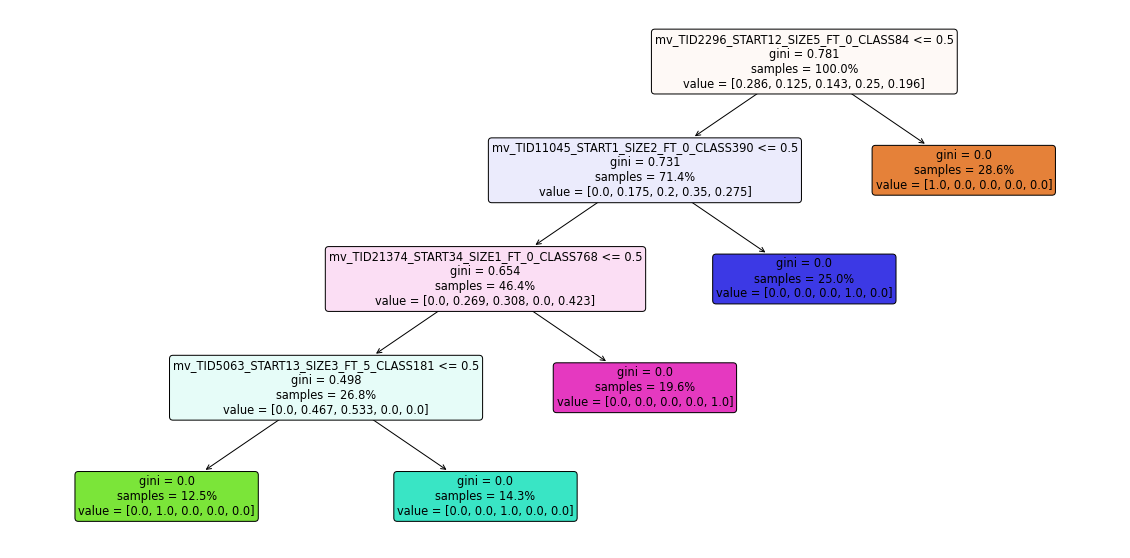

In [13]:
fig = model.plot_tree()

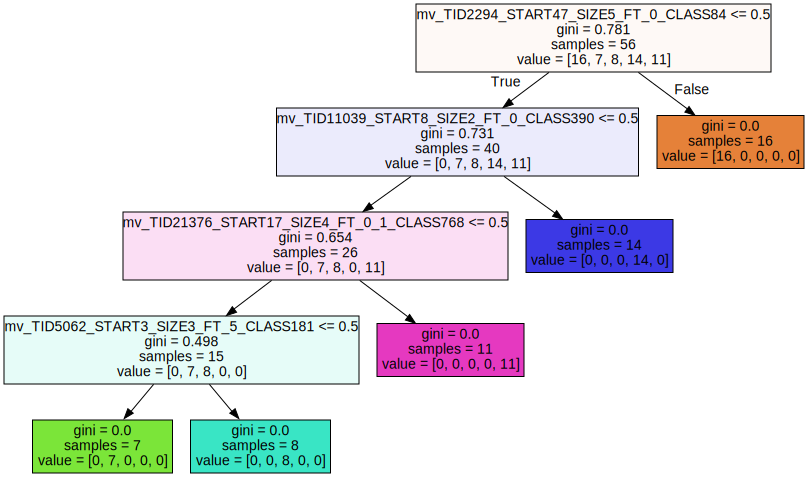

In [14]:
model.graph_tree()

---
## 3. Scripts

The scripts provided with this package for using some of the library functions in command line environment.

### 3.1. Classifications Methods

In [21]:
# The MARC classifier:
!python3 matanalysis/scripts/cls/MARC.py 'sample/data/Brightkite/train.csv' 'sample/data/Brightkite/test.csv' 'sample/results/marc/metrics-file.csv'

{'train-file': 'sample/data/Brightkite/train.csv', 'test-file': 'sample/data/Brightkite/test.csv', 'metrics-file': 'sample/results/marc/metrics-file.csv', 'embedding_size': 100, 'merge_tipe': 'concatenate', 'rnn_cell': 'lstm', 'seed': 1, 'geo_precision': 8, 'no_gpu': False}
Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

2024-04-10 19:02:37.900084: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-10 19:02:37.900177: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-04-10 19:02:37.900931: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defa

### 3.3. Helpers for Experimental Results:

In [9]:
!python3 matanalysis/scripts/helpers/MAT-Summary.py ./sample/results/hiper

Done.


---
# Extras

I) if we want to read and prepare the movelets feature matrix splitting into: train, validation and text sets:

In [6]:
import pandas as pd

# Splitting the train data into train and validation 
df_train = pd.read_csv('./sample/results/train.csv')
df_train['tid'] = df_train.index

from matdata.preprocess import trainAndTestSplit
df_train, df_val = trainAndTestSplit(df_train, train_size=0.75, tid_col='tid', class_col='class', outformats=[])
df_train.drop(columns=['tid'], inplace=True)
df_val.drop(columns=['tid'], inplace=True)

df_train.to_csv('sample/results/train_1.csv', index=False)
df_val.to_csv('sample/results/train_2.csv', index=False)

  0%|          | 0/10 [00:00<?, ?it/s]

In [5]:
# Reading the movelet data:
from matclassification.methods import read_features_csv
X_train, y_train = read_features_csv('./sample/results', 'train_1.csv')
X_val, y_val = read_features_csv('./sample/results', 'train_2.csv')
X_test, y_test = read_features_csv('./sample/results', 'test.csv')

Loading train and test data from... ./sample/results
Done.
Number of attributes: 747
Loading train and test data from... ./sample/results
Done.
Number of attributes: 747
Loading train and test data from... ./sample/results
Done.
Number of attributes: 747


And, use it in a classifier:

In [8]:
from matclassification.methods import MDT

model = MDT()
model.fit(X_train, y_train, X_val, y_val)
model.predict(X_test, y_test)

model.summary()


[MDT:] Building model
[MDT:] Processing time: 19.398 milliseconds. Done.


acc  acc_top_K5  balanced_accuracy  precision_macro  recall_macro  \
0  0.947368    0.973684           0.926667         0.936337      0.958498   

   f1_macro  
0  0.926667

---
### That's all, thanks!

\# By Tarlis Portela (2023)